### 1) Carregando bibliotecas e dados

#### 1.1) Carregando bibiliotecas

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gdown
from datetime import datetime, date
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from plotting import (multiple_histograms_plot, plot_confusion_matrix,
                      plot_roc, predictions_hist)
                      

#### 1.2) Carregando os dados

In [219]:
%%bash
if [  -d "data" ]
then 
    echo "folder 'data' already created, do nothing" 
else
    mkdir data
    echo "created 'data' folder"
fi

folder 'data' already created, do nothing


In [220]:
FILE_INFO = {
    'client_tr': {
        'url':      'https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm',
        'output':   'data/client.train.csv'
    },
    'client_te': {
        'url':      'https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw',
        'output':   'data/client.test.csv'
    },
    'client_ch': {
        'url':      'https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV',
        'output':   'data/client.challenge.csv'
    },
    'orders': {
        'url':      'https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ',
        'output':   'data/orders.csv'
    },
    'product': {
        'url':      'https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ',
        'output':   'data/product.csv'
    }
}

In [221]:
key = 'client_tr'
gdown.download(**FILE_INFO[key], quiet=0)
treino = pd.read_csv(
   FILE_INFO[key]['output'],
   index_col=0, 
   sep=',', 
   encoding='utf-8',
   parse_dates=['birthdate']
)
treino

Downloading...
From: https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm
To: c:\Users\bruno\Documents\Data Science & ML Tera\Desafio Ensembles\data\client.train.csv
100%|██████████| 788k/788k [00:00<00:00, 3.26MB/s]


,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


In [222]:
key = 'client_te'
gdown.download(**FILE_INFO[key], quiet=0)
teste = pd.read_csv(
   FILE_INFO[key]['output'],
   index_col=0, 
   sep=',', 
   encoding='utf-8',
   parse_dates=['birthdate']
)
teste

Downloading...
From: https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw
To: c:\Users\bruno\Documents\Data Science & ML Tera\Desafio Ensembles\data\client.test.csv
100%|██████████| 263k/263k [00:00<00:00, 1.42MB/s]


,birthdate,state,gender,is_churn
client_id,,,,
cx06840,1982-12-03,st15,cg1,False
cx01931,1979-05-09,st15,cg1,False
cx35431,1965-05-09,st15,cg1,False
cx36233,1954-03-15,st15,cg2,False
cx13540,1965-06-19,st15,cg1,False
...,...,...,...,...
cx19119,1980-05-31,st24,cg1,False
cx21963,1984-08-25,st15,cg2,False
cx37195,1960-01-16,st13,cg2,False


In [223]:
key = 'client_ch'
gdown.download(**FILE_INFO[key], quiet=0)
desafio = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
desafio

Downloading...
From: https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV
To: c:\Users\bruno\Documents\Data Science & ML Tera\Desafio Ensembles\data\client.challenge.csv
100%|██████████| 217k/217k [00:00<00:00, 1.14MB/s]


,birthdate,state,gender
client_id,,,
cx12525,1932-04-19,st15,cg1
cx32280,1983-03-01,st15,cg1
cx00471,1964-08-30,st15,cg2
cx18876,1971-04-27,st15,cg2
cx38255,1958-01-26,st15,cg1
...,...,...,...
cx37820,1980-05-01,st04,cg1
cx00770,1964-10-12,st18,cg2
cx01686,1972-07-20,st24,cg2


In [224]:
key = 'product'
gdown.download(**FILE_INFO[key], quiet=0)
produtos = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)
produtos

Downloading...
From: https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ
To: c:\Users\bruno\Documents\Data Science & ML Tera\Desafio Ensembles\data\product.csv
100%|██████████| 950k/950k [00:00<00:00, 3.32MB/s]


,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


In [225]:
key = 'orders'
gdown.download(**FILE_INFO[key], quiet=0)
pedidos = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)
pedidos

Downloading...
From: https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ
To: c:\Users\bruno\Documents\Data Science & ML Tera\Desafio Ensembles\data\orders.csv
100%|██████████| 13.3M/13.3M [00:00<00:00, 23.6MB/s]


,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


### 2) Análise Exploratória inicial

#### 2.1) Treino

In [226]:
treino.describe()

<ipython-input-226-79f05cc56aef>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  treino.describe()


,birthdate,state,gender,is_churn
count,23292,23292,23292,23292
unique,13046,27,2,2
top,1990-01-01 00:00:00,st15,cg1,False
freq,58,8201,12879,19085
first,1900-01-15 00:00:00,NaN,NaN,NaN
last,2010-12-31 00:00:00,NaN,NaN,NaN


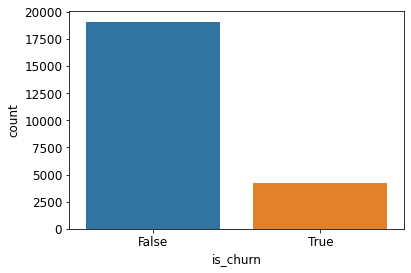

In [227]:
sns.countplot(data=treino,x='is_churn');

Temos um dataset um pouco desbalanceado entre True e False mas não chega a ser um problema provavelmente, já que temos mais de 2500 amostras de churn.

<AxesSubplot:xlabel='state'>

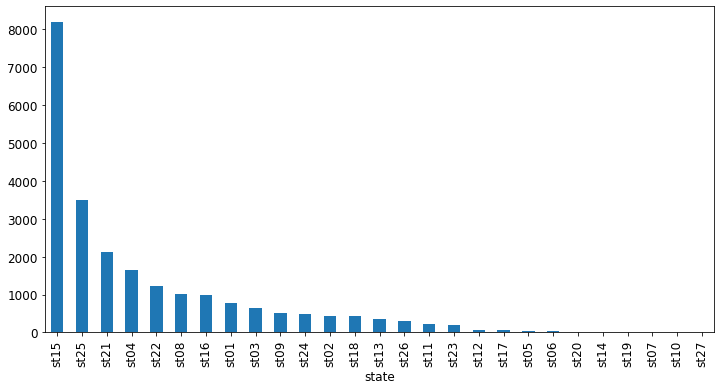

In [228]:
treino.groupby('state')['is_churn'].agg('count').sort_values(ascending=False).plot(kind='bar',figsize = (12,6))

Agrupando por estado também vemos que há predominancia significativa de alguns estados na nossa base de treino, com outros quase nem aparecendo. Se os estados tivessem com os nomes reais ao invés de labels poderíamos agrupar por região por exemplo.

A idade média é de : 44.5 anos
A mediana da idade é de : 42.0 anos
O desvio padrão da idade é de : 13.7 anos


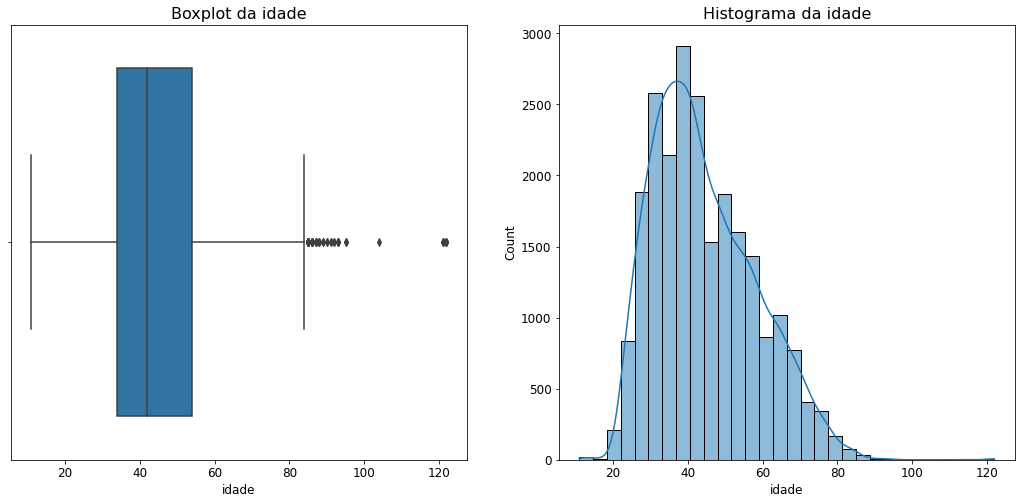

In [229]:
agora = pd.Timestamp('now')
idade = pd.DataFrame()
idade['idade']= pd.to_datetime(treino['birthdate'], format = '%m%d%y')
idade['idade'] = idade['idade'].where(idade['idade'] < agora, idade['idade'] - np.timedelta64(100,'Y'))
idade['idade'] = (agora  - idade['idade']).astype('<m8[Y]')
idade['genero'] = treino['gender']
fig, ax = plt.subplots(1,2, figsize = (18,8))
ax[0].set_title('Boxplot da idade', fontsize = 16)
ax[1].set_title('Histograma da idade', fontsize = 16)
sns.boxplot(ax = ax[0], data=idade, x = 'idade');
sns.histplot(ax = ax[1], data = idade, x = 'idade', kde = True, bins = 30);
print(f'A idade média é de : {idade.idade.mean():.1f} anos')
print(f'A mediana da idade é de : {idade.idade.median():.1f} anos')
print(f'O desvio padrão da idade é de : {idade.idade.std():.1f} anos')

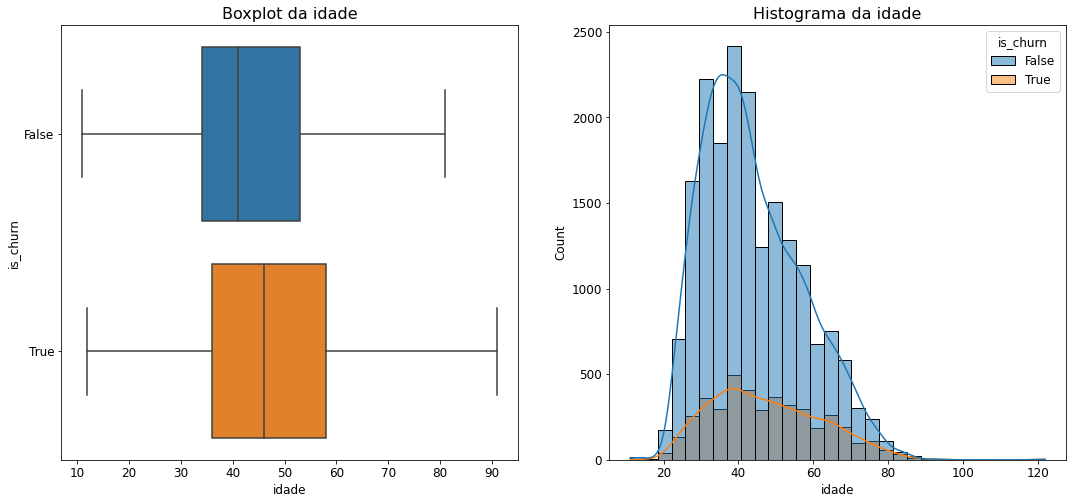

In [230]:
agora = pd.Timestamp('now')
idade = pd.DataFrame()
idade['idade']= pd.to_datetime(treino['birthdate'], format = '%m%d%y')
idade['idade'] = idade['idade'].where(idade['idade'] < agora, idade['idade'] - np.timedelta64(100,'Y'))
idade['idade'] = (agora  - idade['idade']).astype('<m8[Y]')
idade['genero'] = treino['gender']
idade = idade.join(treino).drop(columns = 'gender')
fig, ax = plt.subplots(1,2, figsize = (18,8))
ax[0].set_title('Boxplot da idade', fontsize = 16)
ax[1].set_title('Histograma da idade', fontsize = 16)
sns.boxplot(ax = ax[0], data=idade, x = 'idade', y = 'is_churn', orient='h', showfliers=False);
sns.histplot(ax = ax[1], data = idade, x = 'idade', kde = True, bins = 30 , hue = 'is_churn');

- Percebemos alguns outliers com usuários de 120 anos. Essas idades são referentes a usuários que tem sua data de nascimento como a primeira do windows, que é 1/1/1900 e portanto teremos que trata-los de alguma forma.
- A partir dos 20 anos há um crescimento considerável na quantidade compras, chegando a mediana aos pouco mais de 40 anos e redução gradativa até praticamente os 80 anos com alguns poucos pedidos fetiso por pessoas com idade acima disso.
- A média de idade das pessoas com churn, assim como a sua distribuição, é alongada. Portanto, podemos validar a hipótese que pessoas mais velhas geram churn. Um dos motivos naturalmente são os falecimentos.

<AxesSubplot:xlabel='idade', ylabel='genero'>

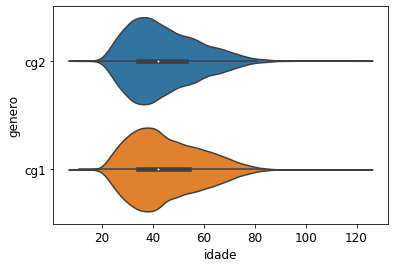

In [231]:
sns.violinplot(data = idade, x = 'idade', y = 'genero')

Vemos também que praticamente não há diferença entre as distribuições de idade por sexo.

#### 2.2) Pedidos

In [232]:
pedidos.head(5)

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.9,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.9,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.9,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.0,pm05,NaN,NaN,st07,dv9,sc08


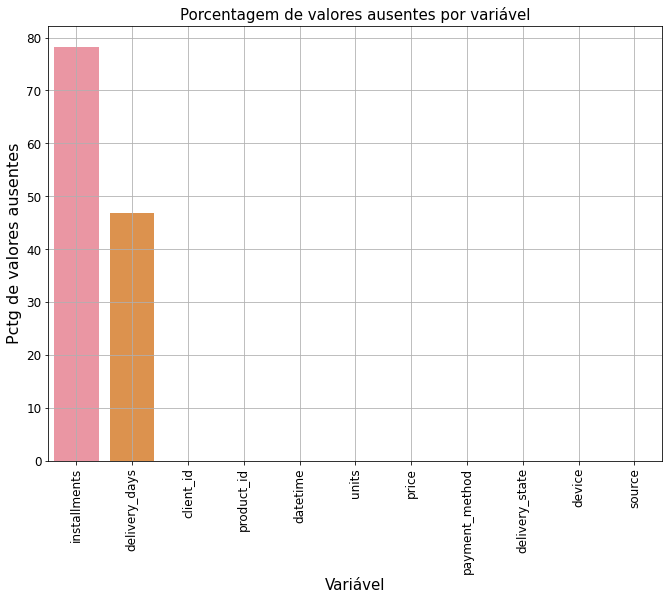

In [233]:
fig, ax = plt.subplots(figsize = (11,8))
df_null =(pedidos.isnull().sum()/len(pedidos))*100
df_null.sort_values(ascending=False, inplace=True)
sns.barplot(x = df_null.index, y =df_null.values)
plt.grid()
plt.title('Porcentagem de valores ausentes por variável', fontsize = 15)
plt.xlabel(xlabel='Variável', fontsize = 15)
plt.ylabel(ylabel = 'Pctg de valores ausentes', fontsize = 16)
plt.xticks(rotation = '90')
plt.show();

In [234]:
pedidos.describe()

,units,price,installments,delivery_days
count,168472.000000,168472.000000,36545.000000,89642.000000
mean,1.228846,451.384291,4.551293,7.017938
std,1.504511,857.769280,4.704385,6.855334
min,0.000000,-8999.000000,1.000000,0.000000
25%,1.000000,39.900000,1.000000,2.000000
50%,1.000000,162.580000,3.000000,5.000000
75%,1.000000,699.000000,7.000000,9.000000
max,110.000000,25648.900000,24.000000,165.000000


- No dataset de pedidos, diferente do de treino, temos valores missing nas colunas de installments e delivery days. Por isso, deveremos elaborar uma estratégia para abordar esses valores missing.
- Conseguimos ver que há pedidos com o valor negativo, provavelmente são estornos. Como estamos falando de churn, não vamos eliminar esses valores que são negativos já que estorno é uma possível causa para o churn de um cliente. Vamos também investigar esses pedidso negativos e verificar se há alguma distribuição de churn no caso deles.
- Vemos que o tempo médio de entrega é de 7 dias com um desvio padrão de 6.85, então para algumas pessoas os pedidos chegam muito rápido e para algumas outras demoram quase duas semanas (há um grande range de variação na distribuição da variável delivery_days)
- A média de unidades por pedido é praticamente de 1 e o valor máximo foram de 110 unidades em um pedido. Também vamos investigar se há relação do número de units com o churn de um cliente.

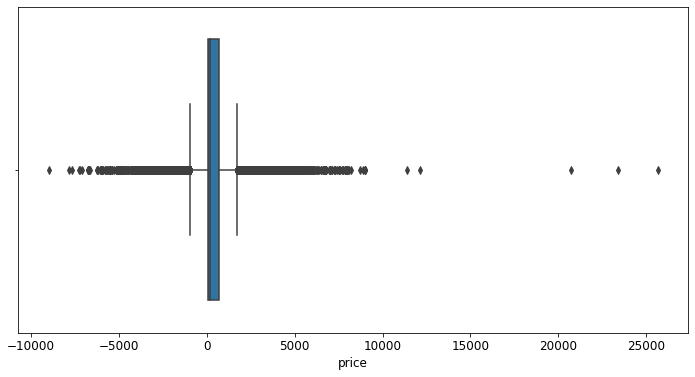

In [235]:
plt.subplots(figsize = (12,6))
sns.boxplot(data = pedidos, x = 'price');

Aqui vemos a distribuição da variável price e como há valores negativos que acabam influenciando na média e mediana. Também verificamos a presença de muitos outliers, por isso vamos investigar dentro do intervalo interquartil.

In [236]:
iqr = pedidos.price.quantile(0.75) - pedidos.price.quantile(0.25)
lsup = (pedidos.price.mean() + 1.5 * iqr)
linf = (pedidos.price.mean() - 1.5 * iqr)
linf, lsup

(-537.265709257445, 1440.0342907425552)

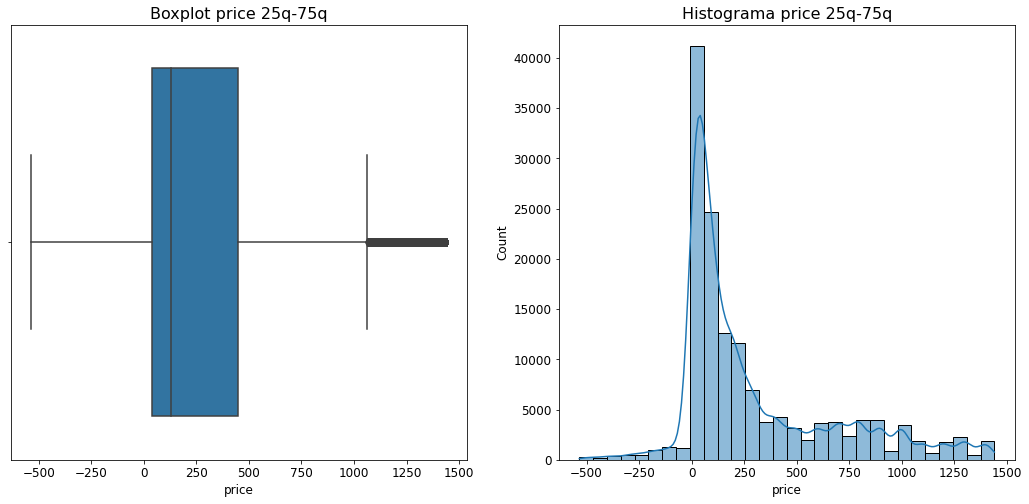

In [237]:
index = (pedidos.price >= linf) & (pedidos.price <= lsup)
desc = pedidos[index]

fig, ax = plt.subplots(1,2, figsize = (18,8))
ax[0].set_title('Boxplot price 25q-75q', fontsize = 16)
ax[1].set_title('Histograma price 25q-75q', fontsize = 16)
sns.boxplot(ax = ax[0], data=desc, x = 'price');
sns.histplot(ax = ax[1], data = desc, x = 'price', kde = True, bins = 30);

A distribuição parece fazer sentido, com a maioria dos valores abaixo de 250 reais. Porém os valores negativos são intrigantes, e devemos investigar se o churn tem alguma diferenciação nesses clientes com preço negativos nos pedidos.

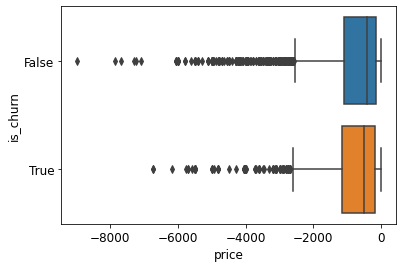

In [238]:
index = pedidos.price < 0
desc = pedidos[index]
desc = treino.merge(desc, on = 'client_id')
desc.is_churn = desc.is_churn.astype('str')
sns.boxplot(data=desc, x = 'price', y = 'is_churn');

Não parece haver diferença na média e na distribiução entre churn e não churn nos clientes que fizeram pedidos com valores negativos. Portanto, não vamos criar nenhuma feature nem alterar os dados nesse sentido.

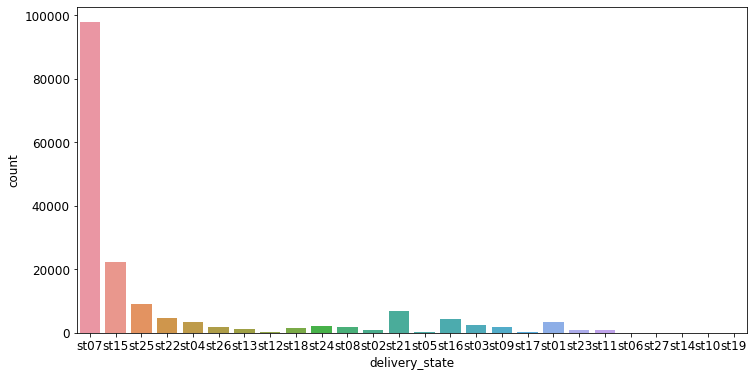

In [239]:
plt.subplots(figsize = (12,6))
sns.countplot(data=pedidos,x='delivery_state');

In [240]:
pedidos.delivery_state.describe()

count     168472
unique        26
top         st07
freq       97820
Name: delivery_state, dtype: object

Aqui surge um ponto de atenção, na variável de delivery_state vimos que as três primeiras st07, st15 e st25 são diferentes dos três primeiros estados na base de clientes que eram 15,25 e 21 (nessa ordem). Por isso, vamos fazer um cruzamento pra verificar a relação entre o estado do cliente e o estado de entrega do pedido.

In [241]:
cliente_pedidos = pd.merge(left = treino, right = pedidos, how = 'left', left_on= 'client_id', right_on= 'client_id')
cliente_pedidos.rename(columns = {'state':'comprador_state', 'gender':'comprador_gender','birthdate':'comprador_birthdate', 'is_churn':'comprador_ischurn'}, inplace = True)

<AxesSubplot:xlabel='check_estado'>

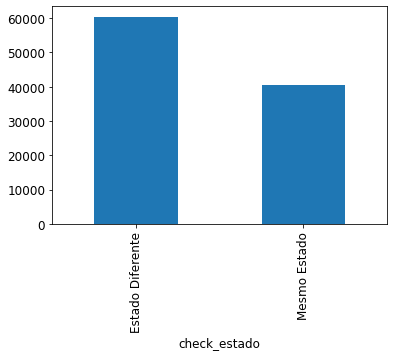

In [242]:
cliente_pedidos['check_estado'] = np.where(cliente_pedidos.comprador_state == cliente_pedidos.delivery_state, 'Mesmo Estado', 'Estado Diferente')
cliente_pedidos.groupby('check_estado')['client_id'].agg('count').plot(kind='bar')

Vemos portanto que de fato são muitos clientes que comprar para estados diferentes, quase 60% são feitos para estados diferentes do cliente que fez a compra. Vamos investigar se há um churn maior em alguma dessas categorias.

Proporção de churn nos clientes que fazem compra pra estados diferentes: comprador_ischurn    0.265281
dtype: float64
Proporção de churn nos clientes que fazem compra pra os mesmos estados: comprador_ischurn    0.121537
dtype: float64


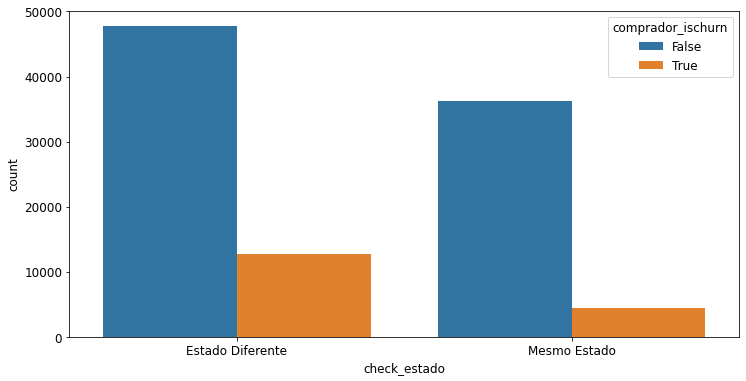

In [243]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(data = cliente_pedidos, x = 'check_estado', hue = 'comprador_ischurn');
prop = cliente_pedidos.groupby(['check_estado','comprador_ischurn'])['comprador_ischurn'].agg('count').to_frame().T
prop.columns = ['ed_false','ed_true','me_false','me_true' ]
prop_ed = prop['ed_true']/prop['ed_false']
prop_me = prop['me_true']/prop['me_false']
print(f'Proporção de churn nos clientes que fazem compra pra estados diferentes: {prop_ed}')
print(f'Proporção de churn nos clientes que fazem compra pra os mesmos estados: {prop_me:}')

Vemos portanto que de fato há uma diferença significativa na proporção churn entre pessoas que compram no mesmo estado (12%) pra pessoas que realizam compras para estados diferentes(26%), portanto devemos na feature engineering criar features que se aproveitem desse poder preditivo dessa diferença de comportamento na variável target.

Agora vamos explorar a variável units, que diz respeito a quantidade de itens inclusos em cada pedido.

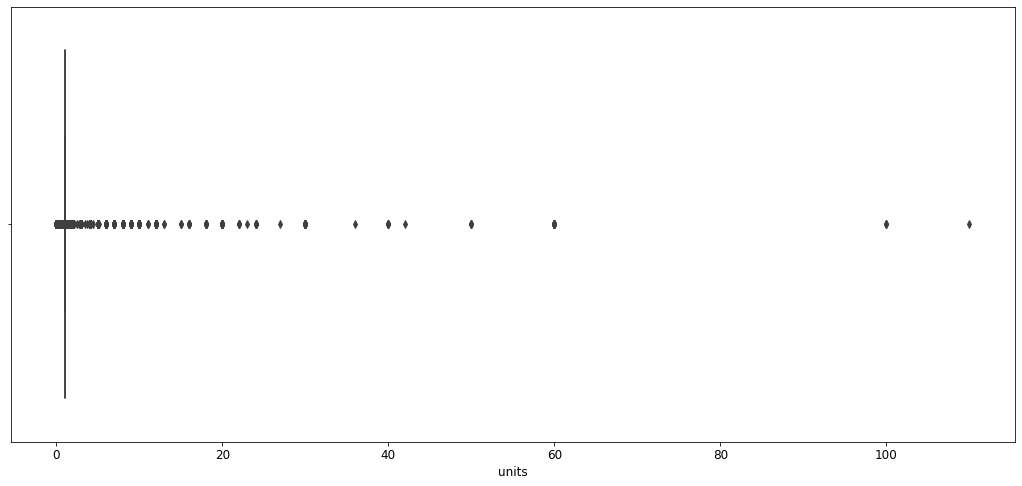

In [244]:
desc = pedidos
desc = treino.merge(desc, on = 'client_id')
plt.subplots(figsize = (18,8))
sns.boxplot(data = desc, x = 'units');

Podemos observar uma cauda longa para a direita e uma mediana bem próxima ao zero. Por isso vamos fazer um corte nos outliers.

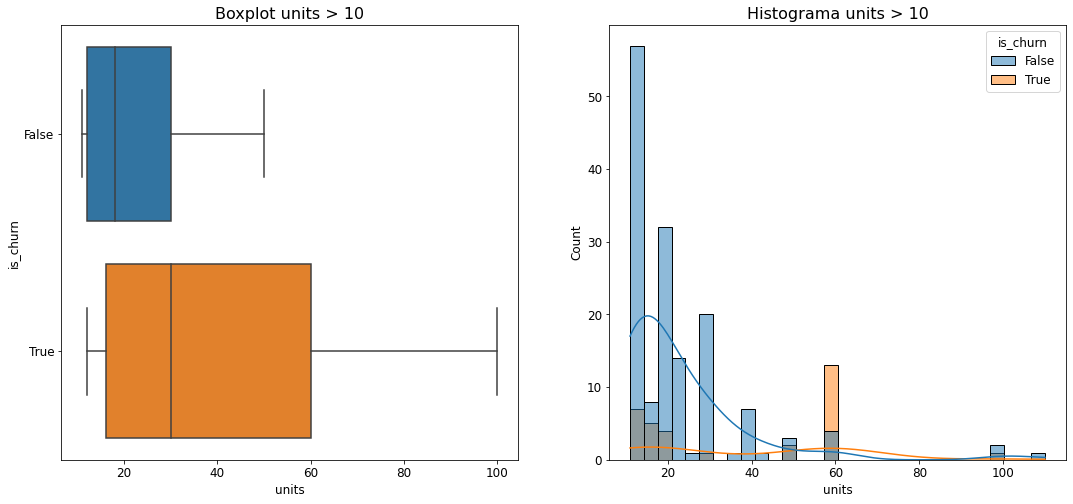

In [245]:
index = pedidos.units > 10 
desc = pedidos[index]
desc = treino.merge(desc, on = 'client_id')
fig, ax = plt.subplots(1,2, figsize = (18,8))
ax[0].set_title('Boxplot units > 10', fontsize = 16)
ax[1].set_title('Histograma units > 10', fontsize = 16)
sns.boxplot(ax = ax[0], data=desc, x = 'units', orient='h', showfliers=False, y = 'is_churn');
sns.histplot(ax = ax[1], data = desc, x = 'units', kde = True, bins = 30, hue = 'is_churn');

Como podemos ver há uma clara diferença na distribuição do churn nos pedidos que tem acima de 10 units. Por isso, trabalharemos na feature engineering pra captar esse poder preditivo. Uma alternativa é uma variável númerico que identifique a soma das units por cliente, ou a média por pedido. Outra é uma variável que conte os pedidos acima de 10 units por cliente, já que estes são mais propensos ao churn.

Agora vamos explorar as variáveis categóricas métodos de pagamento, fonte e dispostivo de compra

In [246]:
pd.crosstab(index = desc['payment_method'], columns = desc['is_churn'], normalize = 'index')*100

is_churn,False,True
payment_method,,
pm02,93.750000,6.250000
pm03,100.000000,0.000000
pm04,100.000000,0.000000
pm05,74.166667,25.833333
pm06,100.000000,0.000000
pm07,100.000000,0.000000
pm09,100.000000,0.000000
pm10,100.000000,0.000000
pm13,100.000000,0.000000


In [247]:
pd.crosstab(index = desc['device'], columns = desc['is_churn'], normalize = 'index')*100

is_churn,False,True
device,,
dv3,95.652174,4.347826
dv4,90.000000,10.000000
dv5,52.777778,47.222222
dv7,95.238095,4.761905
dv8,33.333333,66.666667
dv9,66.666667,33.333333


In [248]:
pd.crosstab(index = desc['source'], columns = desc['is_churn'], normalize = 'index')*100

is_churn,False,True
source,,
sc02,100.000000,0.000000
sc04,90.000000,10.000000
sc05,92.857143,7.142857
sc07,100.000000,0.000000
sc08,66.666667,33.333333
sc09,94.117647,5.882353
sc10,100.000000,0.000000
sc11,52.777778,47.222222
sc12,92.727273,7.272727


Vemos que tanto para o device, quanto para método e forma de pagamento, não há variação na escala da proporção de churn pra nenhuma das categorias das variáveis. Portanto, podemos dizer que o poder preditivo dessas variáveis não é tão alto.

Agora vamos investigar a variável delivery_days, uma das nossas hipóteses pra preencher os NaN é que há variação da média de dias de entrega por estado, então faria sentido preencher os NaNs com a mediana daquele estado. Uma forma de validar essa hipótese é verificar as distribuições por estado e ver se de fato há diferença nas distribuições da variável delivery days por estado.

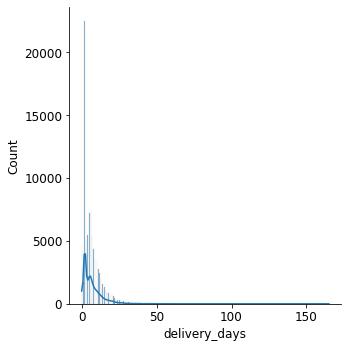

In [249]:
sns.displot(pedidos['delivery_days'], kde = True);

Na variável delivery days vemos que há uma cauda bem longa, por isso uma solução será fazer uma variável categórica com faixa de dias já que se houver poder preditivo ele vai ser captado pela variável categórica. Vamos tentar visualizar melhor a variável aplicando um corte pra pegar a faixa onde os dados tem maior densidade e explorar as distribuições por estado.

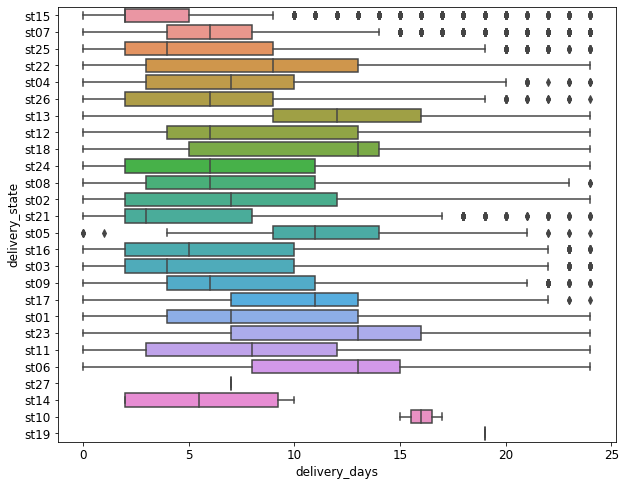

In [250]:
index = pedidos.delivery_days < 25 
desc = pedidos[index]
plt.subplots(figsize = (10,8))
sns.boxplot( data = desc, x = 'delivery_days', y = 'delivery_state');

Com esse gráfico acima é possível validar nossa hipótese que há grande variação na variável deliery days a depender do estado que é feita a entrega. A mediana é inferior a 10 dias para a maioria dos estados, porém para vários outros fica entre 10 e 15 dias e para alguns, como o st10 e st19, ele até ultrapassa os 15 dias para a entrega (possivelmente são estados da região norte que tem mais dificuldade com a logística)

### 3) Limpeza e pré-processamento

Ajustando as idades que foram geradas por conta das datas de nascimento que tinham ano 1900. -> Vamos criar a coluna de idade e substituir as que são outliers. Vamos considerar outliers usuários com mais de 105 anos.

In [251]:
treino['idade']= pd.to_datetime(treino['birthdate'], format = '%m%d%y')
treino['idade'] = treino['idade'].where(treino['idade'] < agora, treino['idade'] - np.timedelta64(100,'Y'))
treino['idade'] = (agora  - treino['idade']).astype('<m8[Y]').astype('int')
treino['idade'] = np.where(treino['idade'] > 105, treino.idade.median(), treino['idade'])

Tratando os valores missing da variável dias de entrega -> Vamos aplicar para os valores missing a média do seu estado, o que faz sentido dado já que a média do estado deve ser mais próxima do valor real do que a média geral.

In [252]:
pedidos['delivery_days'] = pedidos.groupby('delivery_state')['delivery_days'].transform(lambda x: x.fillna(x.median()))

Tratando os valores missing da variável installment -> na descrição dos dados temos que os valores missing para a variável installment são os casos que não se aplicam, ou seja, não existe parcelas. Então, provavelmente se tratam de pagamentos a vista. Portanto, vamos assumir os valores NaN como 1.

In [253]:
pedidos['installments'].fillna(1, inplace=True)

Conferindo se os valores missing foram eliminados

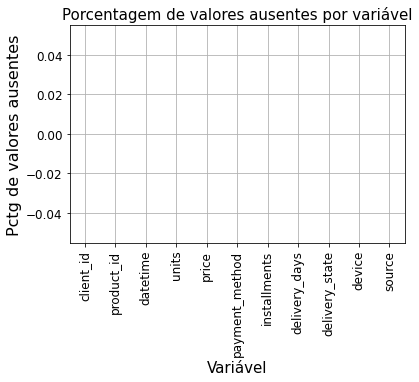

In [254]:
fig, ax = plt.subplots(figsize = (6,4))
df_null =(pedidos.isnull().sum()/len(pedidos))*100
df_null.sort_values(ascending=False, inplace=True)
sns.barplot(x = df_null.index, y =df_null.values)
plt.grid()
plt.title('Porcentagem de valores ausentes por variável', fontsize = 15)
plt.xlabel(xlabel='Variável', fontsize = 15)
plt.ylabel(ylabel = 'Pctg de valores ausentes', fontsize = 16)
plt.xticks(rotation = '90')
plt.show();

### 4) Feature Engineering

In [255]:
class OrderAggregatorFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe base para FeaturesTransformers que usam os dados de Histórico de Vendas para extrair os dados.
    """
    
    def __init__(self, orders_table, columns=None, product_table=None, imputer=None):
        
        self.work_table = None
        if product_table is not None:
            self.refr_table = pd.merge(
                orders_table,
                product_table.reset_index(),
                on='product_id'
                
            ) #gera tabela fazendo o join dos produtos com os pedidos, isso ajuda depois a contar os subgrupos de pedidos
        else:
            self.refr_table = orders_table.copy()
        if columns is not None:
            self.refr_table = self.refr_table[['client_id', *columns]]
        self._reset_database()
        self.imputer = imputer
        self.columns = columns

    def _reset_database(self):
        self.work_table = self.refr_table.copy()
        return self

    def _process_client(self, df):
        return df.set_index('client_id')

    def _select_orders(self, df):
        idx = self.work_table['client_id'].isin(df.index)
        return self.work_table[idx]

    def fit(self, X, y=None, **fit_params):
        if self.imputer is not None:
            self._reset_database()
            self.imputer.fit(self._select_orders(X)[self.columns])
            self.work_table.loc[:, self.columns] = self.imputer.transform(self.work_table[self.columns]) #pra fazer o fit do imputer (preencher valores missing)
        return self
    
    def transform(self, X):
        return self._select_orders(X).groupby('client_id').apply(self._process_client)

In [256]:
class UniqueCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x.unique())).rename(index=lambda x: f'qtdu_{x}') #faz a len dos elementos unicos e adiciona o _qtdu ao titulo


class NormalCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x)).rename(index=lambda x: 'total_pedidos') #faz a len dos elementos unicos e adiciona o _qtd ao titulo

class SumValuesTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.sum().rename(index=lambda x: f'soma_{x}') # faz a soma e adiciona o _sum no titulo

class DistributionTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = (super()
               ._process_client(df)
               .describe() #aqui gera as features de min, max, 25p, 50p, 75p, avg e std
               .drop(index='count') #tira o count do describe
               .rename(index=lambda c: c.replace('%', 'pct')) #substitui o % que vem no describe por pct no indíce
               .rename(index={'mean': 'media'}) #substitui mean por media no indíce
               .rename(index={'std': 'desv'}) #substitui std por desv no indíce
               .unstack()) #desfaz o desmembramento transformando o subgrupo em coluna
        tmp.index = tmp.index.map('_'.join)  #adiciona o nome da feature gerada no describe com o nome dos atributos passados na tabela pedidos
        return tmp


class CountStateMatchesTransform(OrderAggregatorFeaturesTransform): #classe que diz quantos pedidos serão entregues no mesmo estado do cliente que fez o pedido e quantos não
    
    def _process_client(self, df):
        tmp = df.set_index('client_id')[['state', 'delivery_state']]
        return pd.Series({
            'qtd_pedidos_estados_iguais': (tmp.state == tmp.delivery_state).sum(),
            'qtd_pedidos_estados_diferentes': (tmp.state != tmp.delivery_state).sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

class SumStateMatchesTransform(OrderAggregatorFeaturesTransform): #classe que soma o valor dos pedidosdo mesmo estado
    
    def _process_client(self, df):
        df['total_pedido'] = df['units'] * df['price']
        tmp = df.set_index('client_id')[['state', 'delivery_state','total_pedido']]
        return pd.Series({
            'soma_pedidos_estados_iguais': tmp.loc[(tmp.state == tmp.delivery_state)]['total_pedido'].sum(),
            'soma_pedidos_estados_diferentes': tmp.loc[(tmp.state != tmp.delivery_state)]['total_pedido'].sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

In [257]:
class FeatureEngineeringTransform(BaseEstimator, TransformerMixin):

    def __init__(self, orders_table, produtos):
        orders_table['total_pedido'] = orders_table.units * orders_table.price #cria na tabela de pedidos o volume por pedido
        self._transf_sum = SumValuesTransform(orders_table=orders_table, columns=['units', 'total_pedido']) #roda a função de soma pras colunas de unidade e volume
        self._transf_stt = CountStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state']]) #roda a função de contar quantos pedidos são do mesmo estado e quantos não
        self._transf_sumstt = SumStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state','price','units']])
        self._transf_cnt = NormalCounterTransform(orders_table=orders_table[['client_id', 'units']]) #A QUE EU CRIEI
        self._transf_ucnt = UniqueCounterTransform(  
            orders_table=orders_table, 
            product_table=produtos, 
            columns=['product_id', 'device', 'source', 'payment_method', 
                     'category_lv0', 'category_lv1', 'category_lv2', 'category_lv3', 'category_lv4']
        ) #função pra fazer o unique count em todas essas colunas de parametro, lembrando que já fizemos o join dos produtos com pedidos então conseguimos contar as subcategorias
        self._transf_dst_med = DistributionTransform(
            orders_table=orders_table, 
            product_table=produtos, 
            columns=['price', 'delivery_days'],
            imputer=SimpleImputer(strategy='median')
        ) #gera as funções do describe(menos count) pra essas colunas price e delivery days aplicando o imputer de mediana pros valores missing (no caso já substituimos anteriormente pela mediana do estado)
        self._transf_dst_one = DistributionTransform(
            orders_table=orders_table, 
            product_table=produtos, 
            columns=['installments'],
            imputer=SimpleImputer(strategy='constant', fill_value=1)
        ) #faz a mesma coisa de acima porém com o imputer preenchendo com 1 os valores missing (as vendas a vista)
        
    def fit(self, X, y=None, **fit_params): 
        self._transf_dst_med.fit(X) #faz o fit da função preenchendo com a mediana
        self._transf_dst_one.fit(X) #faz o fit da função preenchendo com 1
        return self
    
    def transform(self, X):     
        output = (X[['gender']] == 'cg1').rename(columns={'gender': 'genero_cg1'}) #cria coluna booleana pro genero
        output.genero_cg1  = output.genero_cg1 * 1
        output['client_age'] = 2021 - X.birthdate.dt.year #cria coluna no output final com a idade 
        output = output.join(self._transf_sum.transform(X)) #aplica a função de soma
        output = output.join(self._transf_stt.transform(X)) #aplica a função de contar as vendas pro mesmo estado do cliente que fez o pedido
        output = output.join(self._transf_sumstt.transform(X))
        output = output.join(self._transf_cnt.transform(X)) #aplica a função de contar os pedidos
        output = output.join(self._transf_ucnt.transform(X)) #aplica a função de contar unicos
        output = output.join(self._transf_dst_med.transform(X)) #aplica a função describe (menos count) com imputer da mediana
        output = output.join(self._transf_dst_one.transform(X)) #aplica a função describe (menos count) com imputer de 1
        output['ticket_medio_pedido'] = output['soma_total_pedido'] / output['total_pedidos']
        output['ticket_medio_estados_iguais'] = output['soma_pedidos_estados_iguais'] / output['qtd_pedidos_estados_iguais']
        output['ticket_medio_estados_diferentes'] = output['soma_pedidos_estados_diferentes'] / output['qtd_pedidos_estados_diferentes']
        output['faixa_qtd_pedidos'] = pd.cut(output['total_pedidos'], bins = [0,1,3,6,12,20,np.inf], labels = ['1', '2 ou 3', '4 a 6', '7 a 12', '12 a 20', 'Mais de 20'])
        output['faixa_soma_valor_pedidos'] = pd.cut(output['soma_total_pedido'], bins = [-np.inf,0,50,200,500,1000,2500,5000, np.inf],labels = ['Negativo', '0 a 50', '50 a 200', '200 a 500', '500 a 1000', '1000 a 2500','2500 a 5000','Mais de 5000'])
        output['faixa_idade'] = pd.cut(output['client_age'], bins = [-np.inf,30,40,50,60, np.inf],labels = ['Menos de 30','30 a 40', '40 a 50', '50 a 60','Mais de 60'])
        output['faixa_units'] = pd.cut(output['soma_units'], bins = [-np.inf,1,5,10,30, np.inf],labels = ['1 item','2 a 5 items','5 a 10 itens', '10 a 30 itens', 'Mais de 30 itens'])
        output['faixa_idade_sexo']  = output.genero_cg1.map(str) + '-' + output.faixa_idade.replace({'Menos de 30': 0,'30 a 40':1, '40 a 50':2, '50 a 60':3,'Mais de 60':4}).astype('int').map(str)
     #   output['faixa_idade_sexo'] = le.fit_transform(output['faixa_idade_sexo'])
        return output

In [258]:
%%time
feateng = FeatureEngineeringTransform(pedidos, produtos).fit(treino) #rodamos a função fit para as tabelas de pedidos e produtos em relação a nossa base de treino

Wall time: 590 ms


In [259]:
%%time
train_dataset = feateng.transform(treino) #rodamos o transform na base de treino pra gerar as features criadas

Wall time: 7min 1s


In [260]:
train_dataset = train_dataset.join(treino).drop(columns = ['birthdate', 'gender', 'idade'])

In [261]:
train_dataset.to_csv('data/client.train.features.v1.csv')

In [262]:
%%time
test_dataset = feateng.transform(teste)

Wall time: 2min 21s


In [263]:
train_dataset

,genero_cg1,client_age,soma_units,soma_total_pedido,qtd_pedidos_estados_iguais,qtd_pedidos_estados_diferentes,soma_pedidos_estados_iguais,soma_pedidos_estados_diferentes,total_pedidos,qtdu_product_id,...,ticket_medio_pedido,ticket_medio_estados_iguais,ticket_medio_estados_diferentes,faixa_qtd_pedidos,faixa_soma_valor_pedidos,faixa_idade,faixa_units,faixa_idade_sexo,state,is_churn
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,0,49,2.00000,119.800000,0,2,0.0,119.800000,2,2,...,59.900000,NaN,59.900000,2 ou 3,50 a 200,40 a 50,2 a 5 items,0-2,st25,False
cx03836,1,55,8.00000,625.720000,0,7,0.0,625.720000,7,6,...,89.388571,NaN,89.388571,7 a 12,500 a 1000,50 a 60,5 a 10 itens,1-3,st15,False
cx08472,1,67,3.00000,2832.920000,0,3,0.0,2832.920000,3,2,...,944.306667,NaN,944.306667,2 ou 3,2500 a 5000,Mais de 60,2 a 5 items,1-4,st15,False
cx12946,1,66,1.00000,69.900000,0,1,0.0,69.900000,1,1,...,69.900000,NaN,69.900000,1,50 a 200,Mais de 60,1 item,1-4,st15,False
cx19045,0,63,16.00000,794.840000,1,14,39.9,754.940000,15,14,...,52.989333,39.9,53.924286,12 a 20,500 a 1000,Mais de 60,10 a 30 itens,0-4,st15,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,1,40,4.00000,1038.020000,0,3,0.0,1038.020000,3,3,...,346.006667,NaN,346.006667,2 ou 3,1000 a 2500,30 a 40,2 a 5 items,1-1,st18,False
cx02434,0,24,1.00000,1952.900000,0,1,0.0,1952.900000,1,1,...,1952.900000,NaN,1952.900000,1,1000 a 2500,Menos de 30,1 item,0-0,st04,False
cx16024,1,71,4.00000,1158.000000,0,3,0.0,1158.000000,3,3,...,386.000000,NaN,386.000000,2 ou 3,1000 a 2500,Mais de 60,2 a 5 items,1-4,st11,False


In [264]:
test_dataset = test_dataset.join(teste).drop(columns = ['birthdate', 'gender'])

In [265]:
test_dataset.to_csv('data/client.test.features.v1.csv')

### 5) Análise exploratória nas novas features

In [266]:
train_dataset.columns

Index(['genero_cg1', 'client_age', 'soma_units', 'soma_total_pedido',
       'qtd_pedidos_estados_iguais', 'qtd_pedidos_estados_diferentes',
       'soma_pedidos_estados_iguais', 'soma_pedidos_estados_diferentes',
       'total_pedidos', 'qtdu_product_id', 'qtdu_device', 'qtdu_source',
       'qtdu_payment_method', 'qtdu_category_lv0', 'qtdu_category_lv1',
       'qtdu_category_lv2', 'qtdu_category_lv3', 'qtdu_category_lv4',
       'price_media', 'price_desv', 'price_min', 'price_25pct', 'price_50pct',
       'price_75pct', 'price_max', 'delivery_days_media', 'delivery_days_desv',
       'delivery_days_min', 'delivery_days_25pct', 'delivery_days_50pct',
       'delivery_days_75pct', 'delivery_days_max', 'installments_media',
       'installments_desv', 'installments_min', 'installments_25pct',
       'installments_50pct', 'installments_75pct', 'installments_max',
       'ticket_medio_pedido', 'ticket_medio_estados_iguais',
       'ticket_medio_estados_diferentes', 'faixa_qtd_pedidos',


In [267]:
train_dataset.soma_units.describe()
#sns.boxplot(data = train_dataset, x = 'soma_units')

count    23292.000000
mean         5.327721
std         11.281354
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        940.000000
Name: soma_units, dtype: float64

In [268]:
train_dataset.soma_total_pedido.describe()
#sns.boxplot(data = train_dataset, x = 'soma_total_pedido')

count     23292.000000
mean       2111.684826
std        3045.724801
min      -11226.980000
25%         470.845000
50%        1378.410000
75%        2842.692298
max      181870.510000
Name: soma_total_pedido, dtype: float64

In [269]:
train_dataset.qtd_pedidos_estados_iguais.describe()
#sns.boxplot(data = train_dataset, x = 'qtd_pedidos_estados_iguais')

count    23292.000000
mean         1.743217
std          3.626971
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         96.000000
Name: qtd_pedidos_estados_iguais, dtype: float64

In [270]:
train_dataset.qtd_pedidos_estados_diferentes.describe()

count    23292.000000
mean         2.593251
std          3.716006
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         98.000000
Name: qtd_pedidos_estados_diferentes, dtype: float64

In [271]:
train_dataset.soma_pedidos_estados_iguais.describe()

count     23292.000000
mean        778.238300
std        2518.185295
min       -3520.100000
25%           0.000000
50%           0.000000
75%         789.900000
max      181870.510000
Name: soma_pedidos_estados_iguais, dtype: float64

In [272]:
train_dataset.soma_pedidos_estados_diferentes.describe()

count    23292.000000
mean      1333.446526
std       2053.979903
min     -11226.980000
25%          0.000000
50%        484.645000
75%       1937.000000
max      38231.000000
Name: soma_pedidos_estados_diferentes, dtype: float64

In [273]:
train_dataset.total_pedidos.describe()

count    23292.000000
mean         4.336467
std          4.667319
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         98.000000
Name: total_pedidos, dtype: float64

In [274]:
train_dataset.qtdu_product_id.describe()

count    23292.000000
mean         3.799287
std          3.720661
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         82.000000
Name: qtdu_product_id, dtype: float64

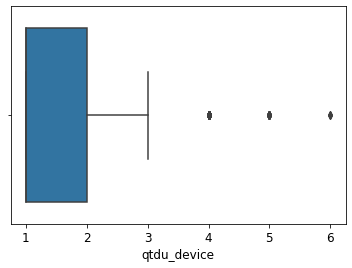

In [275]:
sns.boxplot(data = train_dataset, x = 'qtdu_device');

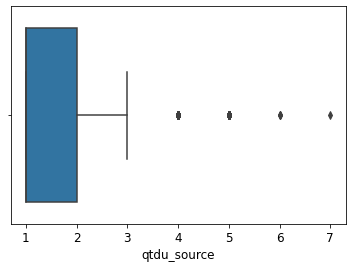

In [276]:
sns.boxplot(data = train_dataset, x = 'qtdu_source');

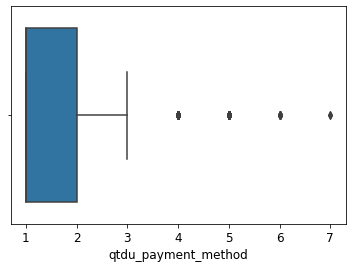

In [277]:
sns.boxplot(data = train_dataset, x = 'qtdu_payment_method');

In [278]:
train_dataset.qtdu_category_lv0.describe()

count    23292.000000
mean         2.598618
std          1.788053
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: qtdu_category_lv0, dtype: float64

In [279]:
train_dataset.qtdu_category_lv1.describe()

count    23292.000000
mean         3.210501
std          2.626565
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         42.000000
Name: qtdu_category_lv1, dtype: float64

In [280]:
train_dataset.qtdu_category_lv2.describe()

count    23292.000000
mean         3.435471
std          2.972214
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         54.000000
Name: qtdu_category_lv2, dtype: float64

In [281]:
train_dataset.qtdu_category_lv3.describe()

count    23292.000000
mean         3.479736
std          3.060195
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         58.000000
Name: qtdu_category_lv3, dtype: float64

In [282]:
train_dataset.qtdu_category_lv4.describe()

count    23292.000000
mean         3.772798
std          3.683718
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         82.000000
Name: qtdu_category_lv4, dtype: float64

In [283]:
train_dataset.ticket_medio_pedido.describe()

count    23292.000000
mean       575.732123
std        770.558172
min       -623.721111
25%        169.059000
50%        399.900000
75%        755.124000
max      72074.715000
Name: ticket_medio_pedido, dtype: float64

In [284]:
train_dataset.ticket_medio_estados_iguais.fillna(0, inplace=True)
train_dataset.ticket_medio_estados_iguais.describe()

count    23292.000000
mean       264.015289
std        727.144040
min       -880.025000
25%          0.000000
50%          0.000000
75%        295.559375
max      72074.715000
Name: ticket_medio_estados_iguais, dtype: float64

In [285]:
train_dataset.ticket_medio_estados_diferentes.fillna(0, inplace=True)
train_dataset.ticket_medio_estados_diferentes.describe()

count    23292.000000
mean       414.733411
std        593.881924
min       -623.721111
25%          0.000000
50%        199.000000
75%        594.317868
max       6998.880000
Name: ticket_medio_estados_diferentes, dtype: float64

is_churn,False,True
faixa_qtd_pedidos,,
1,85.388877,14.611123
2 ou 3,82.060695,17.939305
4 a 6,77.595451,22.404549
7 a 12,81.408177,18.591823
12 a 20,90.883978,9.116022
Mais de 20,96.153846,3.846154


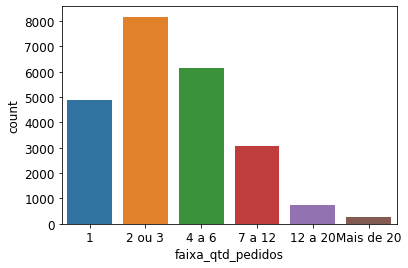

In [286]:
sns.countplot( data = train_dataset, x = 'faixa_qtd_pedidos');
pd.crosstab(index = train_dataset['faixa_qtd_pedidos'], columns = train_dataset['is_churn'], normalize = 'index')*100

Aparentemente a maioria dos clientes fez entre 2 e 3 pedidos. O churn cresce até a faixa de 4 a 6 pedidos, quando chega a sua maior proporção (22.4%). Em seguida ele volta a descer, o que faz sentido, dado que os clientes que fizeram mais pedidos são os mais fiéis. Na faixa dos clientes que fizeram mais de 20 pedidos o churn é de apenas 3.8%

is_churn,False,True
faixa_soma_valor_pedidos,,
Negativo,79.268293,20.731707
0 a 50,80.254777,19.745223
50 a 200,85.000000,15.000000
200 a 500,82.165163,17.834837
500 a 1000,81.433876,18.566124
1000 a 2500,80.998109,19.001891
2500 a 5000,80.449391,19.550609
Mais de 5000,85.940499,14.059501


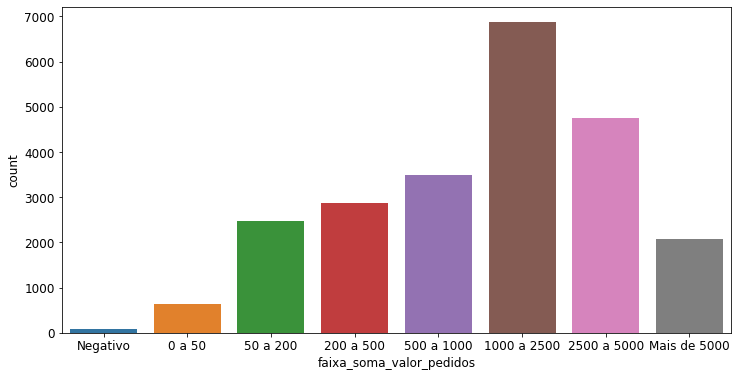

In [287]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = train_dataset, x = 'faixa_soma_valor_pedidos');
pd.crosstab(index = train_dataset['faixa_soma_valor_pedidos'], columns = train_dataset['is_churn'], normalize = 'index')*100

Aparentemente não há variação entre o churn na soma dos valores dos pedidos

is_churn,False,True
faixa_idade,,
Menos de 30,85.449664,14.550336
30 a 40,84.827390,15.172610
40 a 50,82.366929,17.633071
50 a 60,79.733333,20.266667
Mais de 60,73.633343,26.366657


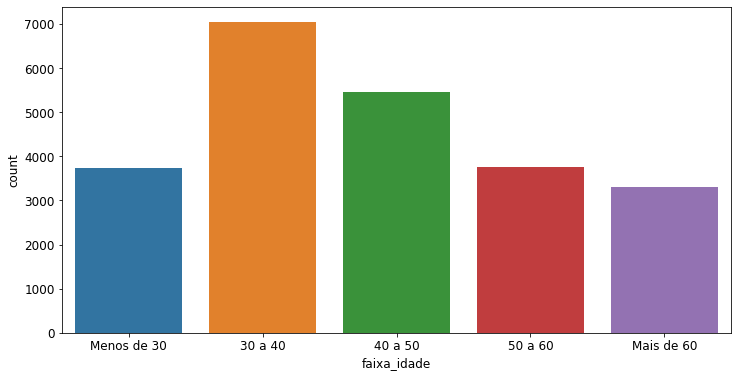

In [288]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = train_dataset, x = 'faixa_idade');
pd.crosstab(index = train_dataset['faixa_idade'], columns = train_dataset['is_churn'], normalize = 'index')*100

Como esperado vemos que há medida que a faixa de idade aumenta o churn aumenta, uma das hipóteses é o falecimento dessas pessoas que ocorre mais a amedida que a idade passa. Vemos também que a faixa com mais usuários é a de 30 a 40 anos.

is_churn,False,True
faixa_units,,
1 item,85.180270,14.819730
2 a 5 items,80.256809,19.743191
5 a 10 itens,79.174312,20.825688
10 a 30 itens,89.442971,10.557029
Mais de 30 itens,94.648829,5.351171


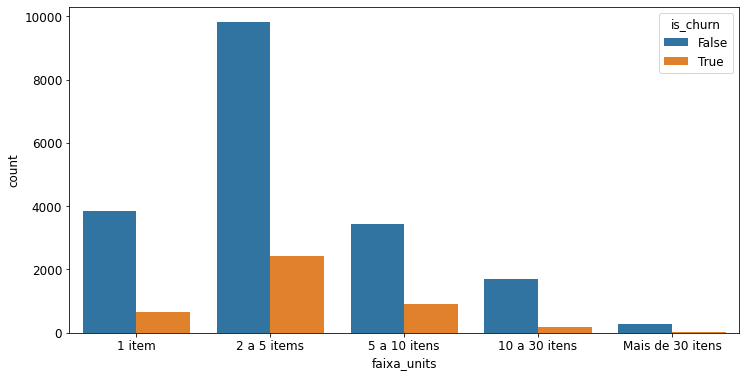

In [289]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = train_dataset, x = 'faixa_units', hue = 'is_churn');
pd.crosstab(index = train_dataset['faixa_units'], columns = train_dataset['is_churn'], normalize = 'index')*100

Vemos que as faixas de 2 a 5 e de 5 a 10 items parece gerar um churn maior do que os clientes que compraram apenas um item ou então dos que compraram mais de 10. A partir de 30 itens o churn cai consideravelmetne pra apenas 5% o que faz sentido dado que são clientes que provavelmente estão comprando em constância, logo não são churn.

is_churn,False,True
faixa_idade_sexo,,
0-0,83.802817,16.197183
0-1,83.758843,16.241157
0-2,81.628478,18.371522
0-3,78.610272,21.389728
0-4,74.025018,25.974982
1-0,86.838199,13.161801
1-1,85.744456,14.255544
1-2,82.963943,17.036057
1-3,80.620525,19.379475


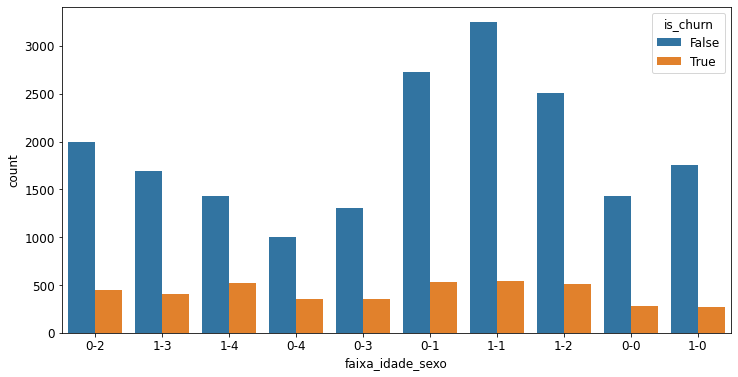

In [290]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = train_dataset, x = 'faixa_idade_sexo', hue = 'is_churn');
pd.crosstab(index = train_dataset['faixa_idade_sexo'], columns = train_dataset['is_churn'], normalize = 'index')*100

Quando cruzamos sexo e idade vemos naturalmente que as -4 (maior faixa de idade), tem o maior churn. E aparentemente não há variação significativa do churn entre os sexos, apenas entre as idades.

### 6) Modelo Baseline

#### 6.1) Funções

In [291]:
from sklearn.metrics import (
    plot_confusion_matrix as plot_mdc, 
    plot_roc_curve as plot_roc, 
    classification_report
)
plt.rcParams['font.size'] = 12



def calculate_far_frr(y_true, y_prob, n_points=30, normalize=False, threshold=None):
    """ Função que calcula os dados para a visualização FAR/FRR.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    n_points: int
        Resolução (quantidade de pontos gerados) do plot.

    normalize: bool
        Escolha entre calcular sobre a saída bruta (quantidade de elementos por corte) ou 
        normalizada (percentual de cada dataset).
        
    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    Return
    ------

    dict
        Dicionário contendo os campos:
            - 'optm': corte ótimo (calculado quando `threshold` for None)
            - 'plot': DataFrame com os parâmetros usados para o plot do FAR/FRR


    """
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_prob[y_true == 0] >= t
        frr_pt = y_prob[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

In [292]:
def plot_far_frr(figsize=(15,10), grid=True, **kwargs):

    """ Função que faz  o plot da visualização FAR/FRR.

    Parameters
    ----------
    
    figsize: tuple (default=(15, 10)),
        Tamanho da imagem na tela.
        
    grid: bool
        Booleada para mostrar/esconder o grid na imagem final.

    **kwargs
        Parâmetros da função `calculate_far_frr`

    Return
    ------

    dict
        Saída da função `calculate_far_frr`


    """
    ffdf = calculate_far_frr(**kwargs)
    plt.figure(figsize=figsize)
    ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
    ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
    plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
    plt.grid(grid)
    plt.xlim(0, 1)
    plt.ylim(0, ffdf['plot'].max().max())
    plt.xlabel('threshold')
    plt.ylabel('count')
    plt.legend()
    return ffdf

In [293]:
def confusion_matrix(y_true, y_prob, threshold=0.5, fontsize=26, figsize=(10, 10), cmap='Blues', **kwargs):
    """ Adaptação da função `plot_confusion_matrix` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    fontsize: int (default=26)
        Tamanho da fonte usada no plot.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    cmap: string (default='Blues')
        Nome do colormap usado no plot.

    **kwargs
        Parametros da função original `plot_confusion_matrix` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    original_fontsize = plt.rcParams['font.size']
    plt.rcParams['font.size'] = fontsize
    y_pred = (y_prob >= threshold).astype(int)
    print(classification_report(y_true, y_pred))
    resp = plot_mdc(
        estimator=DummyModel(y_pred, y_prob),
        X=None, y_true=y_true,
        cmap=cmap, ax=plt.figure(figsize=figsize).gca(), 
        **kwargs
    )
    plt.rcParams['font.size'] = original_fontsize
    return resp

In [294]:
class DummyModel(object):
    """ Interface que simula o funcionamento de um modelo, usado para funções de plot baseadas em modelos.
    """

    def __init__(self, y_pred: pd.Series = None, y_prob: pd.Series = None):
        self.y_pred = y_pred
        self.y_prob = y_prob
        self._estimator_type = "classifier"
        self.classes_ = [0, 1]

    def predict(self, X):
        if self.y_pred is None:
            return self.y_pred
        return self.y_pred.values

    def predict_proba(self, X):
        if self.y_prob is None:
            return self.y_prob
        return self.y_prob.values

In [295]:
def plot_roc_curve(y_true, y_prob, figsize=(10, 10), **kwargs):
    """ Adaptação da função `plot_roc_curve` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    **kwargs
        Parametros da função original `plot_roc_curve` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    return plot_roc(
        estimator=DummyModel(y_prob=y_prob),
        X=None, y=y_true,
        ax=plt.figure(figsize=figsize).gca(),
        **kwargs
    )

In [296]:
def metricas_desafio(y_verdadeiro, y_previsao,nome_modelo):
    verdadeiros_positivos = 0
    falsos_positivos = 0
    verdadeiros_negativos = 0
    falsos_negativos = 0

    for i in range(len(y_previsao)): 
        if y_verdadeiro[i]==y_previsao[i]==1:
           verdadeiros_positivos += 1
        if y_previsao[i]==1 and y_verdadeiro[i]!=y_previsao[i]:
           falsos_positivos += 1
        if y_verdadeiro[i]==y_previsao[i]==0:
           verdadeiros_negativos += 1
        if y_previsao[i]==0 and y_verdadeiro[i]!=y_previsao[i]:
           falsos_negativos += 1
      
    accuracy = (verdadeiros_positivos+verdadeiros_negativos)/(verdadeiros_positivos+falsos_positivos+falsos_negativos+verdadeiros_negativos)
    precision = verdadeiros_positivos/(verdadeiros_positivos+falsos_positivos)
    recall = verdadeiros_positivos/(verdadeiros_positivos+falsos_negativos)
    f1 = 2 * (precision * recall) / (precision + recall)

    data = {'nome_modelo':nome_modelo,
       'verdadeiros_positivos':verdadeiros_positivos,
       'falsos_positivos':falsos_positivos,
       'verdadeiros_negativos':verdadeiros_negativos,
       'falsos_negativos': falsos_negativos,
       'acurácia':accuracy,
       'precisão':precision,
       'recall':recall,
       'f1':f1}

    return(pd.DataFrame(data, index=[0]))

#### 6.1 Logreg Baseline

In [297]:
datasets = [train_dataset,test_dataset]

for dataset in datasets:
    le = preprocessing.LabelEncoder()
    dataset['faixa_qtd_pedidos'] = dataset['faixa_qtd_pedidos'].replace({'1': 0, '2 ou 3': 1, '4 a 6': 2, '7 a 12': 3 , '12 a 20': 4 , 'Mais de 20': 5 })
    dataset['faixa_soma_valor_pedidos'] = dataset['faixa_soma_valor_pedidos'].replace({'Negativo':0, '0 a 50':1, '50 a 200':2, '200 a 500':3, '500 a 1000':4, '1000 a 2500':5,'2500 a 5000':6,'Mais de 5000':7})
    dataset['faixa_idade'] = dataset['faixa_idade'].replace({ 'Menos de 30':0,'30 a 40':1, '40 a 50':2, '50 a 60':3,'Mais de 60':4})
    dataset['faixa_units'] = dataset['faixa_idade'].replace({ '1 item':1,'2 a 5 items':2,'5 a 10 itens':3, '10 a 30 itens':4, 'Mais de 30 itens':5})
    dataset['is_churn'] = dataset['is_churn'] * 1
    dataset['faixa_idade_sexo'] = le.fit_transform(dataset['faixa_idade_sexo'])
    dataset['state'] = le.fit_transform(dataset['state'])

In [298]:
#scale_cols = train_dataset.columns[1:48]
#scaler = StandardScaler().fit(train_dataset[scale_cols])
#scaler

In [299]:
#train_dataset.loc[:, scale_cols] = scaler.transform(train_dataset.loc[:, scale_cols])
train_dataset.fillna(-1, inplace = True)
test_dataset.fillna(-1, inplace = True)

In [300]:
train_dataset

,genero_cg1,client_age,soma_units,soma_total_pedido,qtd_pedidos_estados_iguais,qtd_pedidos_estados_diferentes,soma_pedidos_estados_iguais,soma_pedidos_estados_diferentes,total_pedidos,qtdu_product_id,...,ticket_medio_pedido,ticket_medio_estados_iguais,ticket_medio_estados_diferentes,faixa_qtd_pedidos,faixa_soma_valor_pedidos,faixa_idade,faixa_units,faixa_idade_sexo,state,is_churn
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,0,49,2.00000,119.800000,0,2,0.0,119.800000,2,2,...,59.900000,0.0,59.900000,1,2,2,2,2,24,0
cx03836,1,55,8.00000,625.720000,0,7,0.0,625.720000,7,6,...,89.388571,0.0,89.388571,3,4,3,3,8,14,0
cx08472,1,67,3.00000,2832.920000,0,3,0.0,2832.920000,3,2,...,944.306667,0.0,944.306667,1,6,4,4,9,14,0
cx12946,1,66,1.00000,69.900000,0,1,0.0,69.900000,1,1,...,69.900000,0.0,69.900000,0,2,4,4,9,14,0
cx19045,0,63,16.00000,794.840000,1,14,39.9,754.940000,15,14,...,52.989333,39.9,53.924286,4,4,4,4,4,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,1,40,4.00000,1038.020000,0,3,0.0,1038.020000,3,3,...,346.006667,0.0,346.006667,1,5,1,1,6,17,0
cx02434,0,24,1.00000,1952.900000,0,1,0.0,1952.900000,1,1,...,1952.900000,0.0,1952.900000,0,5,0,0,0,3,0
cx16024,1,71,4.00000,1158.000000,0,3,0.0,1158.000000,3,3,...,386.000000,0.0,386.000000,1,5,4,4,9,10,0


In [301]:
teste_y = test_dataset.is_churn
teste_x = test_dataset.drop(columns = 'is_churn')
treino_y = train_dataset.is_churn
treino_x = train_dataset.drop(columns=['is_churn'])

In [302]:
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [303]:
logreg.fit(treino_x,treino_y)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [304]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=logreg.predict_proba(teste_x)[:, 1]
)
y_prob_te

client_id
cx06840    0.503112
cx01931    0.519950
cx35431    0.544413
cx36233    0.631216
cx13540    0.552020
             ...   
cx19119    0.486033
cx21963    0.523759
cx37195    0.581540
cx16851    0.432654
cx15796    0.395626
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


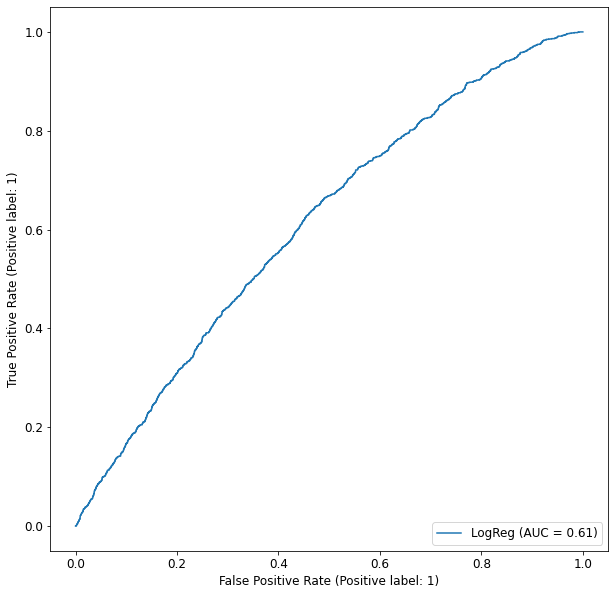

In [305]:
pred_y = logreg.predict_proba(teste_x)
_ = plot_roc_curve(teste_y,y_prob_te, name = 'LogReg')

Threshold de teste: 0.5757575757575758


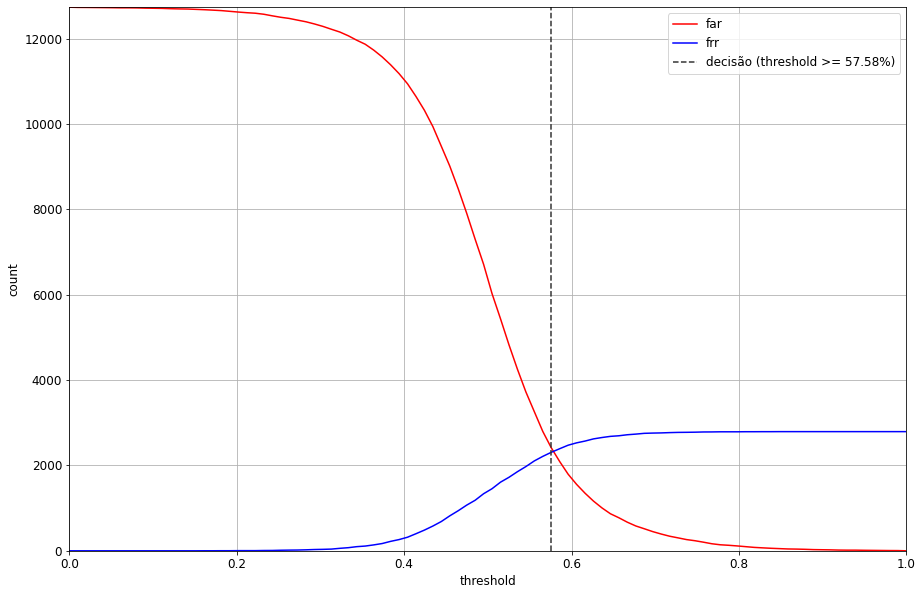

In [306]:
pred_y = logreg.predict_proba(teste_x)


ffdf = plot_far_frr(
    y_true=teste_y, y_prob=pred_y, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6368
           1       0.26      0.23      0.24      1396

    accuracy                           0.74      7764
   macro avg       0.55      0.54      0.54      7764
weighted avg       0.73      0.74      0.74      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


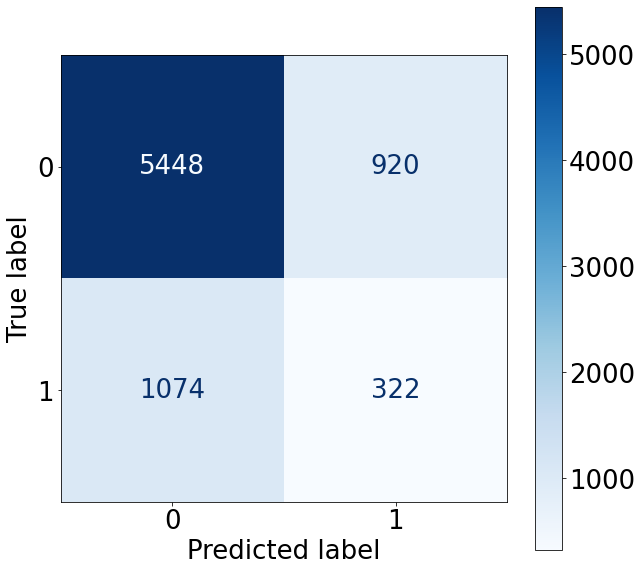

In [307]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [308]:
modelos_treinados = dict()
modelos_threshold = dict()
tabela_resultados = None
nome_modelo = 'RegressãoLogística (baseline)'
modelos_treinados[nome_modelo] = logreg
modelos_threshold[nome_modelo] = threshold
resultados = pd.DataFrame(columns = ['nome_modelo','verdadeiros_positivos',
'falsos_positivos',
'verdadeiros_negativos',
'falsos_negativos',
'acurácia',
'precisão',
'recall',
'f1'])

In [309]:
resultado_reglog = metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_reglog],ignore_index=True)

### 7) Treinamento modelos complexos

#### 7.1) Random Forest

##### 7.1.1) Random Forest baseline

In [310]:
rf = (RandomForestClassifier(random_state=42,  
                             class_weight='balanced',
                             max_depth= 5,
)
      .fit(treino_x, treino_y))

In [311]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=rf.predict_proba(teste_x)[:, 1]
)
y_prob_te

client_id
cx06840    0.611739
cx01931    0.597603
cx35431    0.529799
cx36233    0.551928
cx13540    0.612231
             ...   
cx19119    0.471697
cx21963    0.538990
cx37195    0.547598
cx16851    0.373007
cx15796    0.393605
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


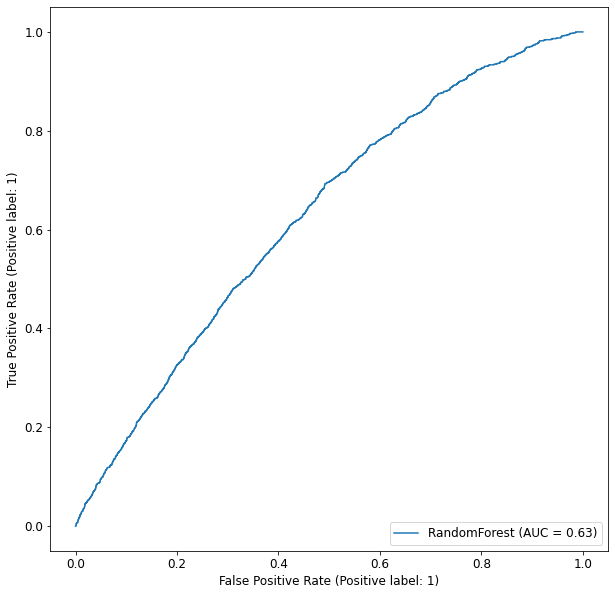

In [312]:
_ = plot_roc_curve(teste_y,y_prob_te, name = 'RandomForest')

Threshold de teste: 0.595959595959596


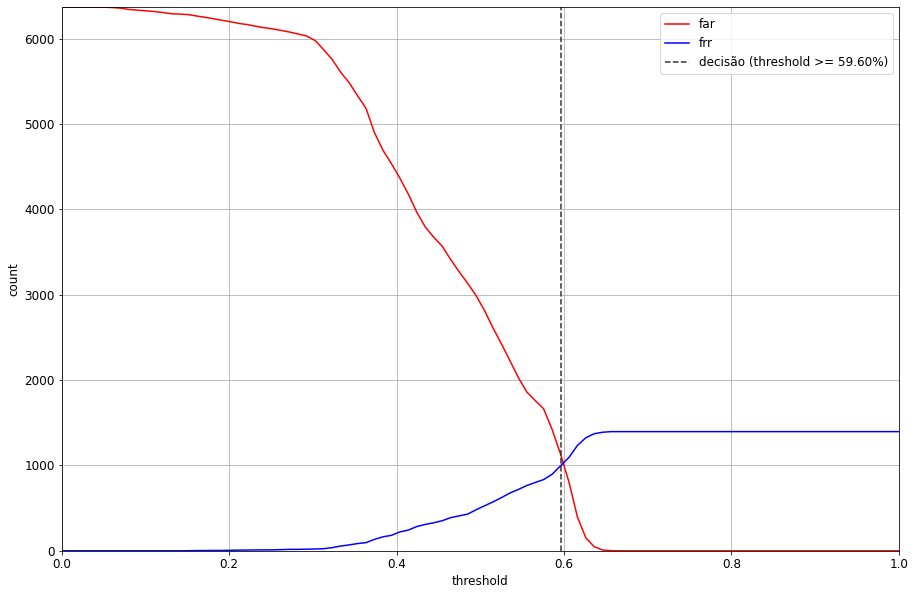

In [313]:
ffdf = plot_far_frr(
    y_true=teste_y, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6368
           1       0.26      0.29      0.27      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.74      0.73      0.73      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


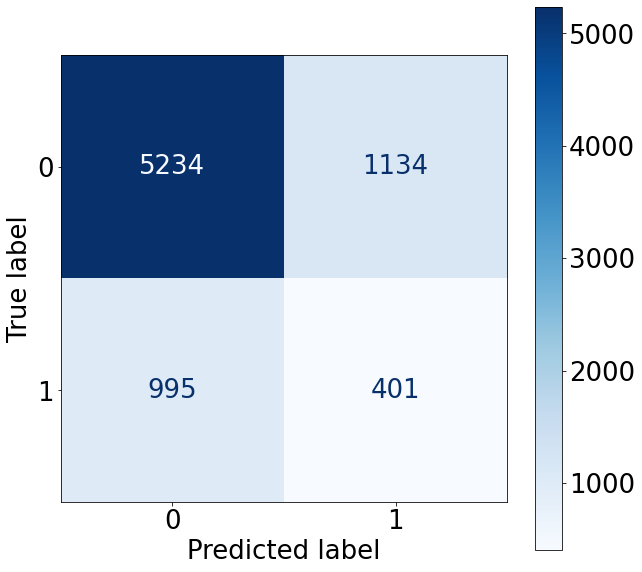

In [314]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [315]:
nome_modelo = 'Random Forest'
modelos_treinados[nome_modelo] = rf
modelos_threshold[nome_modelo] = threshold

resultado_rf= metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_rf],ignore_index=True)

##### 7.1.2) Random Forest com Tuning dos Hiperparametros

In [316]:
rf = RandomForestClassifier()
param_grid = {'min_samples_split':[1,2,3,5]
              ,'max_depth': [2,3,4,5],
              'min_samples_leaf' : [2,3, 4,5],
              'max_features' : [11,12,13,14,15],
              'class_weight': ['balanced'],
              'random_state':[42]}

In [317]:
grid_search = GridSearchCV(rf,
                           param_grid,
                           n_jobs=-1,
                           scoring='accuracy',
                           cv=5)
grid_rf = grid_search.fit(treino_x,treino_y)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\bruno\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\bruno\anaconda3\lib\site-package

In [318]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=grid_rf.predict_proba(teste_x)[:, 1]
)
y_prob_te

client_id
cx06840    0.621110
cx01931    0.590807
cx35431    0.528941
cx36233    0.566900
cx13540    0.627093
             ...   
cx19119    0.477385
cx21963    0.549408
cx37195    0.555112
cx16851    0.364101
cx15796    0.394679
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


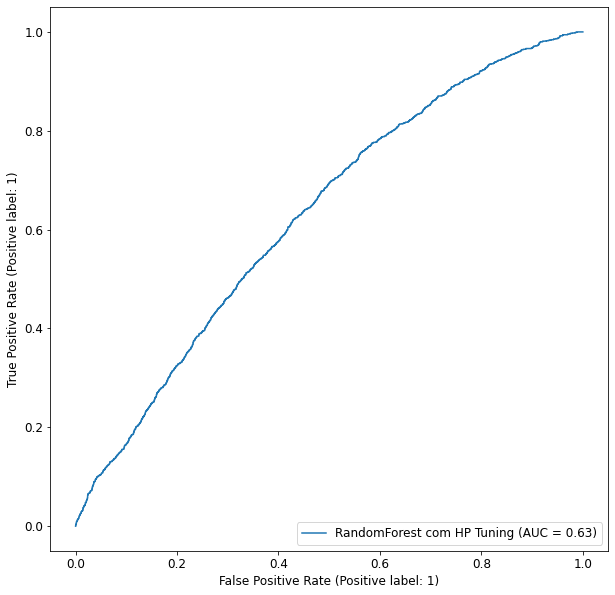

In [319]:
_ = plot_roc_curve(teste_y,y_prob_te, name = 'RandomForest com HP Tuning')

In [320]:
print("Tuned Random Parâmetros do Modelo Random Forest Tunado: {}".format(grid_rf.best_params_))
print("Melhor score é {}".format(grid_rf.best_score_))

Tuned Random Parâmetros do Modelo Random Forest Tunado: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
Melhor score é 0.5720905653964482


Threshold de teste: 0.6060606060606061


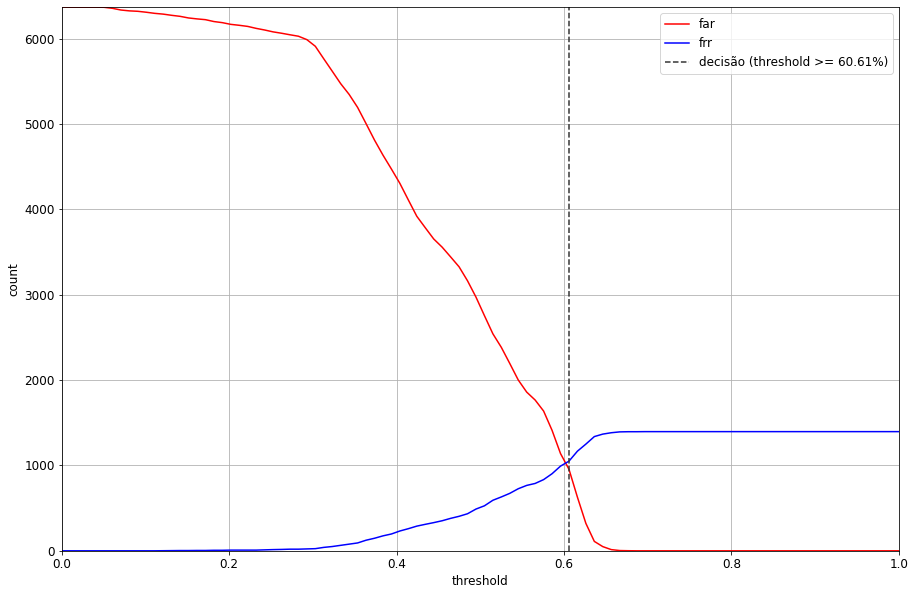

In [321]:
pred_y = grid_rf.predict_proba(teste_x)

ffdf = plot_far_frr(
    y_true=teste_y, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6368
           1       0.27      0.25      0.26      1396

    accuracy                           0.74      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.73      0.74      0.74      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


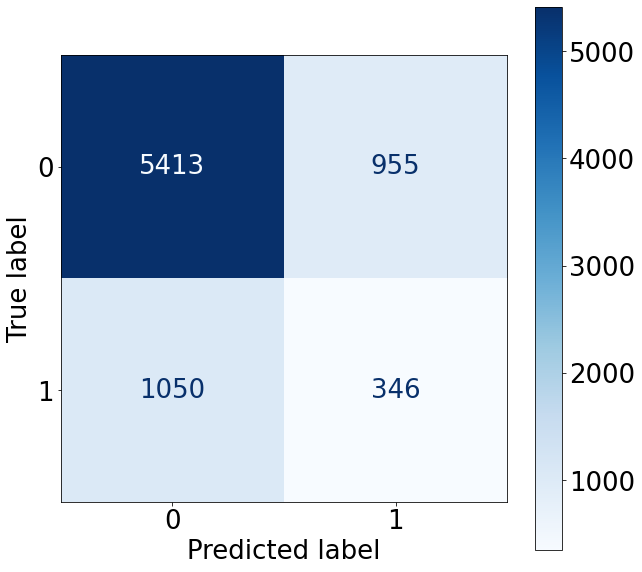

In [322]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [323]:
nome_modelo = 'Random Forest com HP Tuning'
modelos_treinados[nome_modelo] = grid_rf
modelos_threshold[nome_modelo] = threshold

resultado_grid_rf= metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_grid_rf],ignore_index=True)

In [324]:
resultados

,nome_modelo,verdadeiros_positivos,falsos_positivos,verdadeiros_negativos,falsos_negativos,acurácia,precisão,recall,f1
0,RegressãoLogística (baseline),322,920,5448,1074,0.743174,0.259259,0.230659,0.244124
1,Random Forest,401,1134,5234,995,0.725786,0.261238,0.287249,0.273627
2,Random Forest com HP Tuning,346,955,5413,1050,0.741757,0.265949,0.247851,0.256581


#### 7.2) Gradient Boost Trees

In [325]:
gbc = GradientBoostingClassifier(random_state=42,
                             max_depth=     3,
                             criterion = 'squared_error',
                             learning_rate= 0.1,
                             )

gbc.fit(treino_x, treino_y)

GradientBoostingClassifier(criterion='squared_error', random_state=42)

In [326]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=gbc.predict_proba(teste_x)[:, 1]
)
y_prob_te

client_id
cx06840    0.323128
cx01931    0.221666
cx35431    0.185754
cx36233    0.195390
cx13540    0.271686
             ...   
cx19119    0.153820
cx21963    0.194935
cx37195    0.239805
cx16851    0.112081
cx15796    0.090735
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


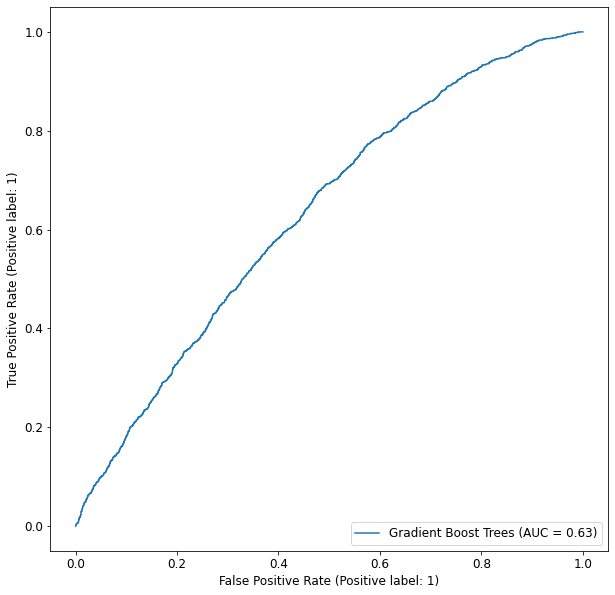

In [327]:
_ = plot_roc_curve(teste_y,y_prob_te, name = 'Gradient Boost Trees')

Threshold de teste: 0.24242424242424243


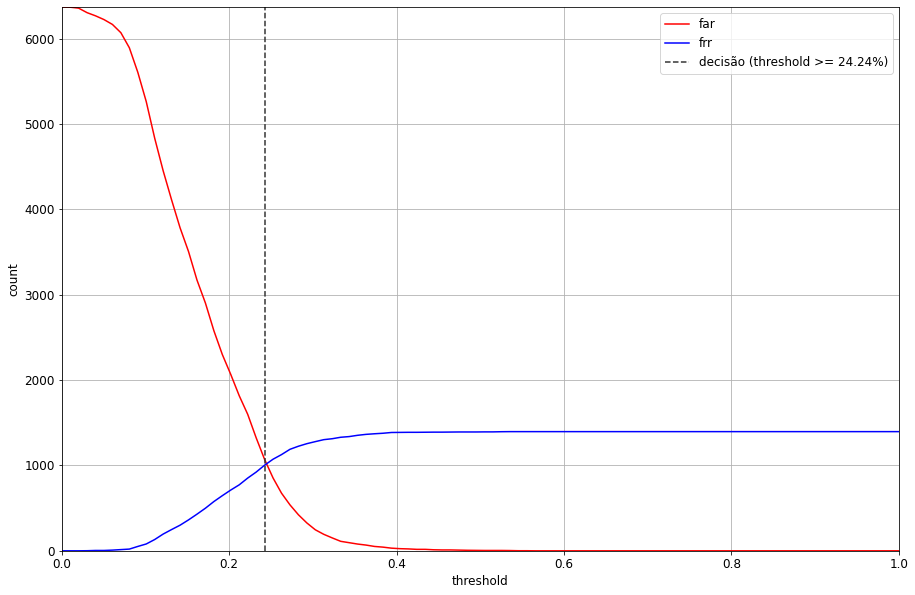

In [328]:
pred_y = gbc.predict_proba(teste_x)


ffdf = plot_far_frr(
    y_true=teste_y, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6368
           1       0.27      0.28      0.27      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.56      0.56      7764
weighted avg       0.74      0.73      0.74      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


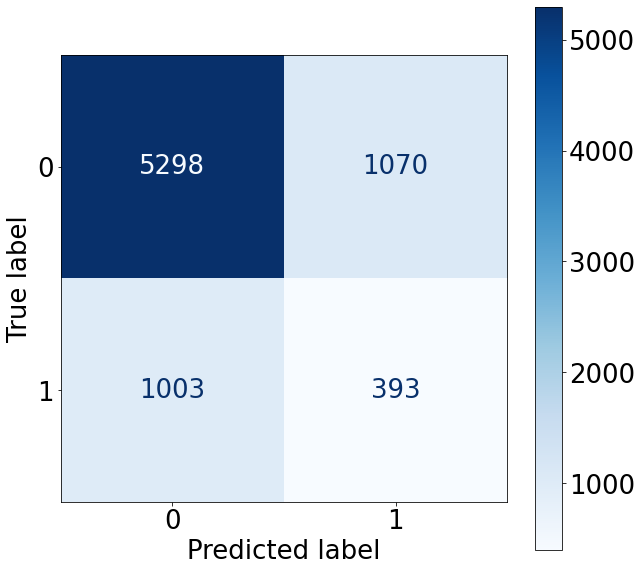

In [329]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [330]:
nome_modelo = 'Gradient Boost Trees'
modelos_treinados[nome_modelo] = gbc
modelos_threshold[nome_modelo] = threshold

resultado_gbc= metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_gbc],ignore_index=True)

In [331]:
resultados

,nome_modelo,verdadeiros_positivos,falsos_positivos,verdadeiros_negativos,falsos_negativos,acurácia,precisão,recall,f1
0,RegressãoLogística (baseline),322,920,5448,1074,0.743174,0.259259,0.230659,0.244124
1,Random Forest,401,1134,5234,995,0.725786,0.261238,0.287249,0.273627
2,Random Forest com HP Tuning,346,955,5413,1050,0.741757,0.265949,0.247851,0.256581
3,Gradient Boost Trees,393,1070,5298,1003,0.732998,0.268626,0.281519,0.274921


#### 7.3) Support Vector Machines

In [332]:
pipeline_svm = Pipeline([
    ('StdScaler', StandardScaler()),
    ('classifier', SVC(probability=True, C = 1, gamma = 0.01))])

In [333]:
pipeline_svm.fit(treino_x,treino_y)

Pipeline(steps=[('StdScaler', StandardScaler()),
                ('classifier', SVC(C=1, gamma=0.01, probability=True))])

In [334]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=pipeline_svm.predict_proba(teste_x)[:, 1]
)
y_prob_te

client_id
cx06840    0.181241
cx01931    0.180883
cx35431    0.180902
cx36233    0.179750
cx13540    0.180739
             ...   
cx19119    0.180654
cx21963    0.180937
cx37195    0.180836
cx16851    0.181095
cx15796    0.178713
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


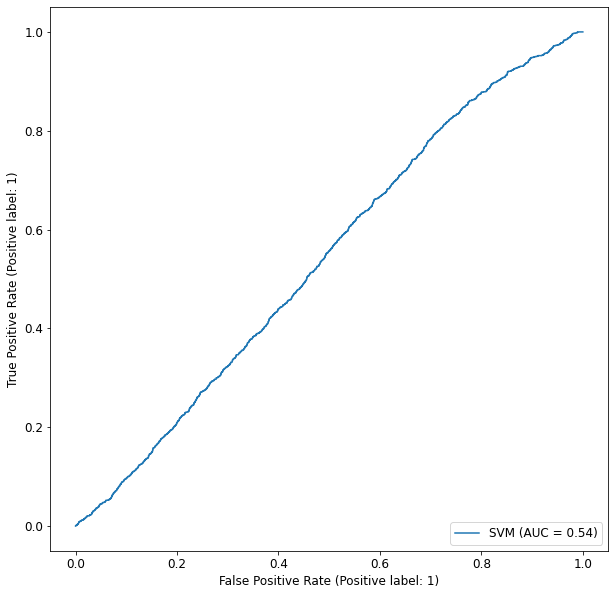

In [335]:
_ = plot_roc_curve(teste_y,y_prob_te, name = 'SVM')

Threshold de teste: 0.18181818181818182


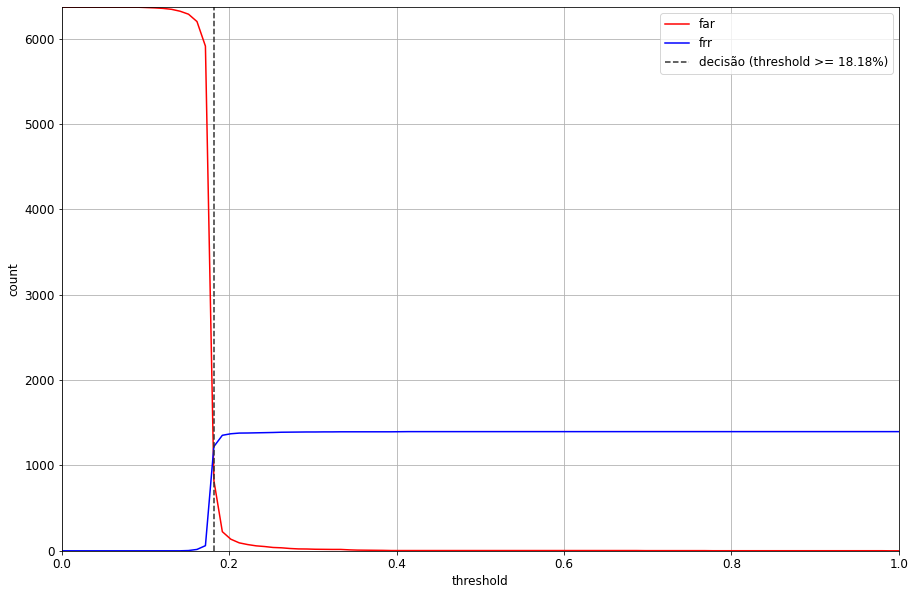

In [336]:
pred_y = pipeline_svm.predict_proba(teste_x)

ffdf = plot_far_frr(
    y_true=teste_y, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      6368
           1       0.18      0.13      0.15      1396

    accuracy                           0.74      7764
   macro avg       0.50      0.50      0.50      7764
weighted avg       0.70      0.74      0.72      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


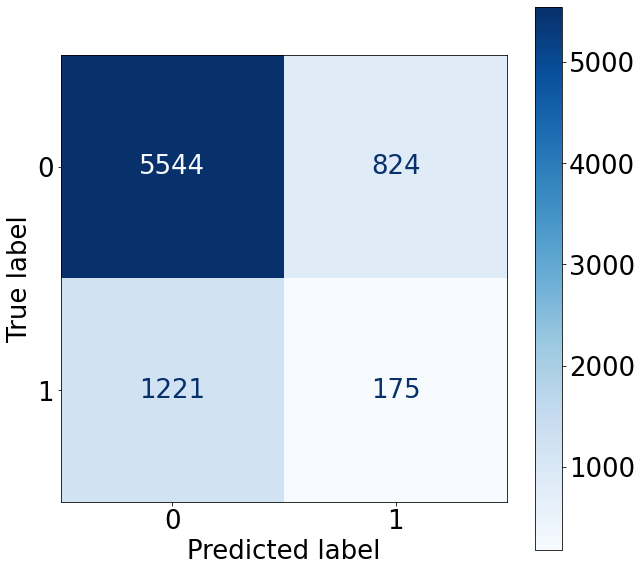

In [337]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [338]:
nome_modelo = 'SVM'
modelos_treinados[nome_modelo] = pipeline_svm
modelos_threshold[nome_modelo] = threshold

resultado_svm= metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_svm],ignore_index=True)

### 8) Agrupando modelos em um Ensemble

In [339]:
modelo = StackingClassifier(
    estimators=list(modelos_treinados.items()),
    final_estimator=RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs = -1, verbose = 3),
    passthrough=True
)
modelo.fit(treino_x,treino_y)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following erro

building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000

building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000building tree 17 of 1000

building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000building tree 21 of 1000
building tree 22 of 1000

building tree 23 of 1000building tree 24 of 1000

building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000building tree 28 of 1000building tree 29 of 1000


building tree 30 of 1000
building tree 31 of 1000building tree 32 of 1000

building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.3s


building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000building tree 176 of 1000

building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000building tree 193 of 1000

building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000building tree 207 of 1000

building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    0.8s


building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000building tree 304 of 1000

building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000building tree 310 of 1000

building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000building tree 317 of 1000

building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    1.5s


building tree 539 of 1000
building tree 540 of 1000
building tree 541 of 1000
building tree 542 of 1000
building tree 543 of 1000
building tree 544 of 1000
building tree 545 of 1000
building tree 546 of 1000
building tree 547 of 1000
building tree 548 of 1000
building tree 549 of 1000
building tree 550 of 1000
building tree 551 of 1000
building tree 552 of 1000
building tree 553 of 1000
building tree 554 of 1000
building tree 555 of 1000
building tree 556 of 1000
building tree 557 of 1000
building tree 558 of 1000
building tree 559 of 1000
building tree 560 of 1000
building tree 561 of 1000
building tree 562 of 1000
building tree 563 of 1000
building tree 564 of 1000
building tree 565 of 1000
building tree 566 of 1000
building tree 567 of 1000building tree 568 of 1000

building tree 569 of 1000
building tree 570 of 1000
building tree 571 of 1000
building tree 572 of 1000
building tree 573 of 1000building tree 574 of 1000

building tree 575 of 1000
building tree 576 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.4s


building tree 839 of 1000
building tree 840 of 1000
building tree 841 of 1000
building tree 842 of 1000
building tree 843 of 1000
building tree 844 of 1000
building tree 845 of 1000
building tree 846 of 1000
building tree 847 of 1000
building tree 848 of 1000
building tree 849 of 1000
building tree 850 of 1000
building tree 851 of 1000
building tree 852 of 1000
building tree 853 of 1000
building tree 854 of 1000
building tree 855 of 1000
building tree 856 of 1000
building tree 857 of 1000
building tree 858 of 1000
building tree 859 of 1000
building tree 860 of 1000
building tree 861 of 1000
building tree 862 of 1000
building tree 863 of 1000
building tree 864 of 1000
building tree 865 of 1000
building tree 866 of 1000
building tree 867 of 1000
building tree 868 of 1000
building tree 869 of 1000
building tree 870 of 1000
building tree 871 of 1000
building tree 872 of 1000
building tree 873 of 1000
building tree 874 of 1000
building tree 875 of 1000
building tree 876 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


StackingClassifier(estimators=[('RegressãoLogística (baseline)',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=1000,
                                                   random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       random_state=42)),
                               ('Random Forest com HP Tuning',
                                GridSearchCV(cv=5,
                                             estimator=RandomForestClassifier(),
                                             n_jobs=-1,
                                             param_grid={'class_weight': ['...
                                                         'random_state': [42]},
                                          

In [340]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=modelo.predict_proba(teste_x)[:, 1]
)
y_prob_te

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


client_id
cx06840    0.283973
cx01931    0.246456
cx35431    0.202428
cx36233    0.218434
cx13540    0.283692
             ...   
cx19119    0.154612
cx21963    0.216764
cx37195    0.233923
cx16851    0.113083
cx15796    0.112964
Length: 7764, dtype: float64

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


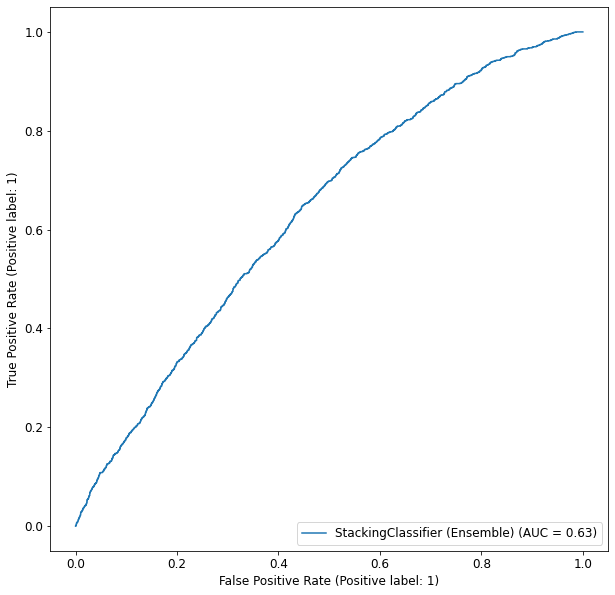

In [341]:
_ = plot_roc_curve(teste_y,y_prob_te, name = 'StackingClassifier (Ensemble)')

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Threshold de teste: 0.25252525252525254


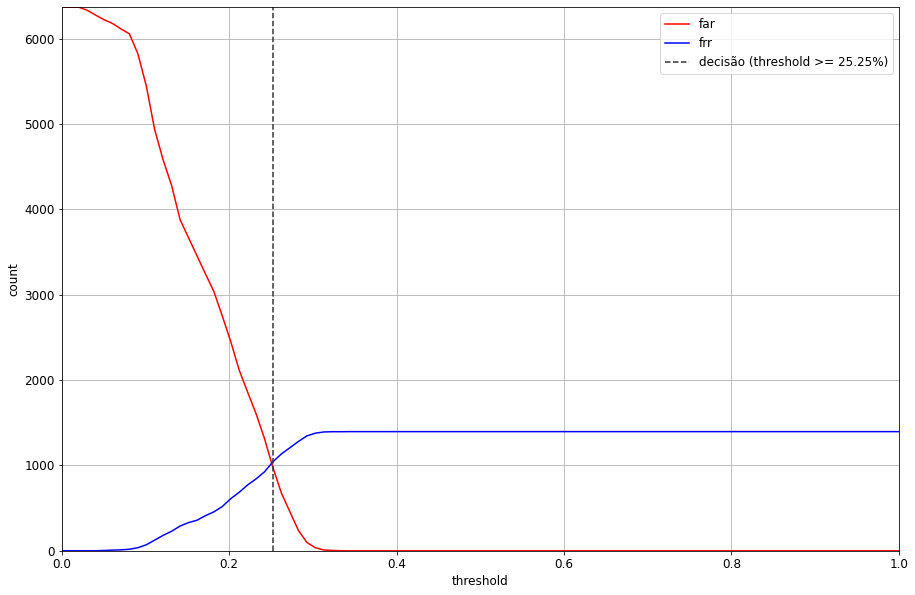

In [342]:
pred_y = modelo.predict_proba(teste_x)

ffdf = plot_far_frr(
    y_true=teste_y, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6368
           1       0.27      0.25      0.26      1396

    accuracy                           0.74      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.73      0.74      0.74      7764



C:\Users\bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


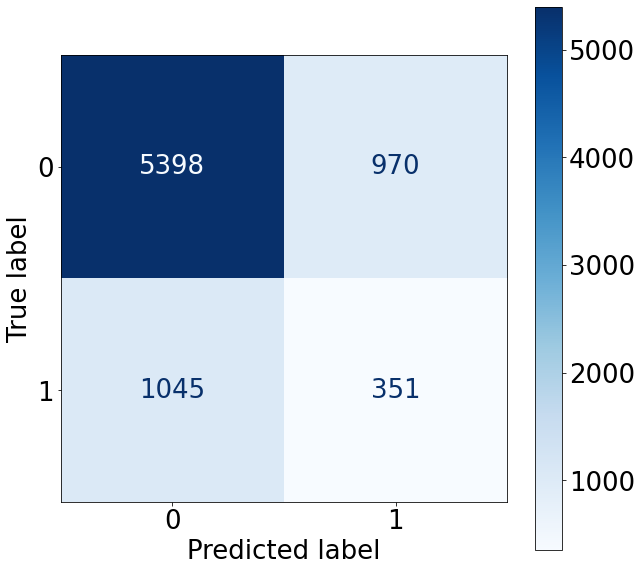

In [343]:
_ = confusion_matrix(teste_y, y_prob_te, threshold=threshold)

In [344]:
nome_modelo = 'StackingClasifier (Ensemble)'
modelos_treinados[nome_modelo] = modelo
modelos_threshold[nome_modelo] = threshold

resultado_svm= metricas_desafio(teste_y,y_prob_te >= threshold,nome_modelo)
resultados = pd.concat([resultados,resultado_svm],ignore_index=True)

In [345]:
resultados.round(3)

,nome_modelo,verdadeiros_positivos,falsos_positivos,verdadeiros_negativos,falsos_negativos,acurácia,precisão,recall,f1
0,RegressãoLogística (baseline),322,920,5448,1074,0.743,0.259,0.231,0.244
1,Random Forest,401,1134,5234,995,0.726,0.261,0.287,0.274
2,Random Forest com HP Tuning,346,955,5413,1050,0.742,0.266,0.248,0.257
3,Gradient Boost Trees,393,1070,5298,1003,0.733,0.269,0.282,0.275
4,SVM,175,824,5544,1221,0.737,0.175,0.125,0.146
5,StackingClasifier (Ensemble),351,970,5398,1045,0.740,0.266,0.251,0.258


Por fim, entre os nossos seis modelos há pouca variação nas métricas de classificação. Porém, é importante observar que alguns modelos desempenham melhor em algumas métricas como a nossa Regressão Logística Baseline teve a maior acurácia, o modelo de ensemble teve a maior precisão, o maior recall e f1 score foi no modelo de Gradient Boost Trees.

### 9) Envio das previsões do Desafio

In [346]:
feateng = FeatureEngineeringTransform(pedidos, produtos).fit(desafio)

In [347]:
desafio_dataset = feateng.transform(desafio)

In [348]:
desafio_dataset = desafio_dataset.join(desafio).drop(columns = ['birthdate', 'gender'])


In [349]:
desafio_dataset.ticket_medio_estados_iguais.fillna(0, inplace=True)
desafio_dataset.ticket_medio_estados_diferentes.fillna(0, inplace=True)
le = preprocessing.LabelEncoder()
desafio_dataset['faixa_qtd_pedidos'] = desafio_dataset['faixa_qtd_pedidos'].replace({'1': 0, '2 ou 3': 1, '4 a 6': 2, '7 a 12': 3 , '12 a 20': 4 , 'Mais de 20': 5 })
desafio_dataset['faixa_soma_valor_pedidos'] = desafio_dataset['faixa_soma_valor_pedidos'].replace({'Negativo':0, '0 a 50':1, '50 a 200':2, '200 a 500':3, '500 a 1000':4, '1000 a 2500':5,'2500 a 5000':6,'Mais de 5000':7})
desafio_dataset['faixa_idade'] = desafio_dataset['faixa_idade'].replace({ 'Menos de 30':0,'30 a 40':1, '40 a 50':2, '50 a 60':3,'Mais de 60':4})
desafio_dataset['faixa_units'] = desafio_dataset['faixa_idade'].replace({ '1 item':1,'2 a 5 items':2,'5 a 10 itens':3, '10 a 30 itens':4, 'Mais de 30 itens':5})
desafio_dataset['faixa_idade_sexo'] = le.fit_transform(desafio_dataset['faixa_idade_sexo'])
desafio_dataset['state'] = le.fit_transform(desafio_dataset['state'])
desafio_dataset.fillna(-1, inplace = True)

In [350]:
desafio_dataset

,genero_cg1,client_age,soma_units,soma_total_pedido,qtd_pedidos_estados_iguais,qtd_pedidos_estados_diferentes,soma_pedidos_estados_iguais,soma_pedidos_estados_diferentes,total_pedidos,qtdu_product_id,...,installments_max,ticket_medio_pedido,ticket_medio_estados_iguais,ticket_medio_estados_diferentes,faixa_qtd_pedidos,faixa_soma_valor_pedidos,faixa_idade,faixa_units,faixa_idade_sexo,state
client_id,,,,,,,,,,,,,,,,,,,,,
cx12525,1,89,5.0,378.09,0,5,0.00,378.09,5,5,...,1.0,75.618000,0.000000,75.618000,2,3,4,4,9,13
cx32280,1,38,5.0,935.21,0,4,0.00,935.21,4,4,...,1.0,233.802500,0.000000,233.802500,2,4,1,1,6,13
cx00471,0,57,10.0,1328.90,0,8,0.00,1328.90,8,6,...,1.0,166.112500,0.000000,166.112500,3,5,3,3,3,13
cx18876,0,50,10.0,8670.07,0,10,0.00,8670.07,10,8,...,1.0,867.007000,0.000000,867.007000,3,7,2,2,2,13
cx38255,1,63,3.0,2148.30,0,3,0.00,2148.30,3,3,...,1.0,716.100000,0.000000,716.100000,1,5,4,4,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx37820,1,41,4.0,372.60,3,0,372.60,0.00,3,3,...,1.0,124.200000,124.200000,0.000000,1,3,2,2,7,3
cx00770,0,57,6.0,665.40,0,4,0.00,665.40,4,4,...,1.0,166.350000,0.000000,166.350000,2,4,3,3,3,16
cx01686,0,49,6.0,591.37,3,1,232.27,359.10,4,3,...,5.0,147.842500,77.423333,359.100000,2,4,2,2,2,21


In [351]:
y_desafio = pd.Series(
    index=desafio_dataset.index,
    data=modelo.predict_proba(desafio_dataset)[:, 1]
)
y_desafio

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


client_id
cx12525    0.322856
cx32280    0.266368
cx00471    0.292726
cx18876    0.211006
cx38255    0.261058
             ...   
cx37820    0.185854
cx00770    0.283037
cx01686    0.130766
cx06266    0.217467
cx38159    0.145466
Length: 7765, dtype: float64

In [353]:
y_desafio.loc[y_desafio > 0.25252525252525254] = True
y_desafio.loc[y_desafio < 0.25252525252525254] = False

In [354]:
y_desafio.to_csv('respostadesafiobrunocaraffa.csv')

### 10) Explicabilidade do Modelo

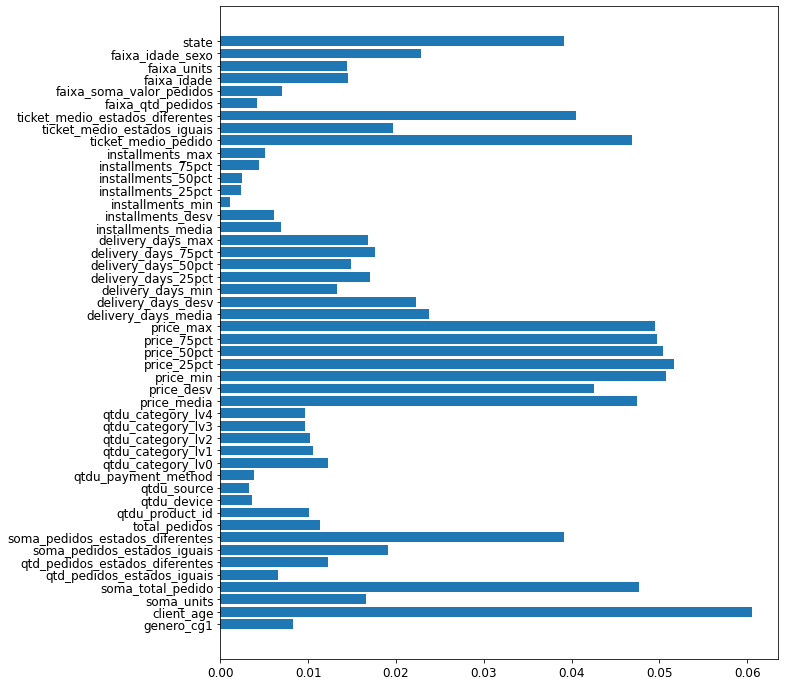

In [355]:
rf.fit(treino_x,treino_y)

fig, ax = plt.subplots(figsize=(10,12))
plt.barh(treino_x.columns, rf.feature_importances_);